In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 1. Carga de los datos y realización de un análisis exploratorio y una evaluación de la calidad de los datos. Evaluación de la integridad, validez y actualidad de los datos. Estrategias de mitigación de los problemas encontrados.

In [2]:
# Cargamos las librerias a usar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

#### 1.1. Carga de Datos:

In [3]:
data = pd.read_csv('/content/drive/MyDrive/AprendizajeAutomatico/compas-scores.csv')
data.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,vr_offense_date,vr_charge_desc,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,type_of_assessment,decile_score.1,score_text,screening_date
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,NaN,NaN,Risk of Violence,1,Low,2013-08-14,Risk of Recidivism,1,Low,2013-08-14
1,2,michael ryan,michael,ryan,2014-12-31,Male,1985-02-06,31,25 - 45,Caucasian,...,NaN,NaN,Risk of Violence,2,Low,2014-12-31,Risk of Recidivism,5,Medium,2014-12-31
2,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,2013-07-05,Felony Battery (Dom Strang),Risk of Violence,1,Low,2013-01-27,Risk of Recidivism,3,Low,2013-01-27
3,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,NaN,NaN,Risk of Violence,3,Low,2013-04-14,Risk of Recidivism,4,Low,2013-04-14
4,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,NaN,NaN,Risk of Violence,6,Medium,2013-01-13,Risk of Recidivism,8,High,2013-01-13


#### 1.2. Exploración inicial:

Tras cargar los datos vamos a realizar una serie de tareas exploratorias para entender la estructura del dataset. Conforme detectemos problemas de calidad de los datos para nuestro estudio en cuestión, los iremos mitigando.

In [4]:
## Hacemos una primera visualización de los datos en bruto
data.head(3)

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,vr_offense_date,vr_charge_desc,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,type_of_assessment,decile_score.1,score_text,screening_date
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,NaN,NaN,Risk of Violence,1,Low,2013-08-14,Risk of Recidivism,1,Low,2013-08-14
1,2,michael ryan,michael,ryan,2014-12-31,Male,1985-02-06,31,25 - 45,Caucasian,...,NaN,NaN,Risk of Violence,2,Low,2014-12-31,Risk of Recidivism,5,Medium,2014-12-31
2,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,2013-07-05,Felony Battery (Dom Strang),Risk of Violence,1,Low,2013-01-27,Risk of Recidivism,3,Low,2013-01-27


In [5]:
# Veamos una descripción general del dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11757 entries, 0 to 11756
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       11757 non-null  int64  
 1   name                     11757 non-null  object 
 2   first                    11757 non-null  object 
 3   last                     11757 non-null  object 
 4   compas_screening_date    11757 non-null  object 
 5   sex                      11757 non-null  object 
 6   dob                      11757 non-null  object 
 7   age                      11757 non-null  int64  
 8   age_cat                  11757 non-null  object 
 9   race                     11757 non-null  object 
 10  juv_fel_count            11757 non-null  int64  
 11  decile_score             11757 non-null  int64  
 12  juv_misd_count           11757 non-null  int64  
 13  juv_other_count          11757 non-null  int64  
 14  priors_count          

Tenemos un datafame en bruto con 47 columnas, muchas con elementos nulos.
Tenemos campos con datos tipo numérico (int y float), fecha (datetime) y objeto. En estapas posteriores veremos si estos son los formatos que más nos interesan para cada una de las variables.

#### 1.3. Valoración de la consistencia de los datos

Vamos a comprobar la no presencia de duplicidades contradictorias en los datos:

In [6]:
# Veamos el número de registros duplicados
data.duplicated(subset=['name','dob'], keep=False).sum()

6

Tenemos 6 registros con duplicados. Vamos a visualizarlos para analizar posibles causas:

In [7]:
# Filtramos los elemenos con nombres y fecha de nacimiento duplicados
data[data.duplicated(subset=['name','dob'], keep=False)].\
            sort_values(by=['name','id'])

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,vr_offense_date,vr_charge_desc,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,type_of_assessment,decile_score.1,score_text,screening_date
6536,6537,alejandro cabrera,alejandro,cabrera,2013-09-23,Male,1990-03-30,26,25 - 45,Caucasian,...,2013-10-06,Battery,Risk of Violence,3,Low,2013-09-23,Risk of Recidivism,4,Low,2013-09-23
11585,11586,alejandro cabrera,alejandro,cabrera,2013-10-07,Male,1990-03-30,26,25 - 45,Hispanic,...,NaN,NaN,Risk of Violence,3,Low,2013-10-07,Risk of Recidivism,4,Low,2013-10-07
604,605,gueslly deravine,gueslly,deravine,2013-03-27,Male,1989-11-30,26,25 - 45,African-American,...,NaN,NaN,Risk of Violence,7,Medium,2013-03-27,Risk of Recidivism,7,Medium,2013-03-27
3761,3762,gueslly deravine,gueslly,deravine,2013-02-21,Male,1989-11-30,26,25 - 45,African-American,...,NaN,NaN,Risk of Violence,6,Medium,2013-02-21,Risk of Recidivism,5,Medium,2013-02-21
3701,3702,scott botkin,scott,botkin,2013-02-08,Male,1969-10-05,46,Greater than 45,Caucasian,...,NaN,NaN,Risk of Violence,3,Low,2013-02-08,Risk of Recidivism,8,High,2013-02-08
9956,9957,scott botkin,scott,botkin,2013-06-18,Male,1969-10-05,46,Greater than 45,Caucasian,...,NaN,NaN,Risk of Violence,2,Low,2013-06-18,Risk of Recidivism,3,Low,2013-06-18


Se trata de 6 registros con 3 nombres duplicados. A priori, cada caso parece la misma persona con dos fechas distintas de evaluación COMPAS. Visualizamos junto con el nombre los campos de fecha sigificativos para ver diferencias:

In [8]:
# Visualización del identificador, nombre y fechas de evalución, reincidencia general y reincidencia violenta,
# de los registros con nombres repetidos
data[['id','name','compas_screening_date','r_offense_date','vr_offense_date']]\
            [data.duplicated(subset=['name','dob'], keep=False)].sort_values(by=['name','id'])

,id,name,compas_screening_date,r_offense_date,vr_offense_date
6536,6537,alejandro cabrera,2013-09-23,2013-10-06,2013-10-06
11585,11586,alejandro cabrera,2013-10-07,NaN,NaN
604,605,gueslly deravine,2013-03-27,NaN,NaN
3761,3762,gueslly deravine,2013-02-21,NaN,NaN
3701,3702,scott botkin,2013-02-08,2014-01-04,NaN
9956,9957,scott botkin,2013-06-18,NaN,NaN


Los únicos registros repetidos corresponden a 3 personas: igual nombre, fecha de nacmiento, edad.
En el primer caso ("Alejandro Cabrera") se observa que el segundo registro se corresponde con una "compas_secreening_data" posterior en un día a la "vr_offense_data", fuera de toda lógica. Parece un error de datos. Vamos a suponer que algo similar sucede con los otros dos. Como además 3 registros suponen muy pocos para el tamaño del dataframe, vamos a eliminar el duplicado.
Nos quedamos con el primer de los registros de cada persona, que además está más completo.
A partir de ahora utilizamos un nuevo dataframe en el que iremos introduciendo las transformaciones necesarias.

In [9]:
# Creamos una copia del dataframe en bruto en el que harems las modificaciones de limpieza y preprocesado
compas=data.drop_duplicates(subset=['name','dob'], keep='first').copy()

In [10]:
# Reseteamos los indices
compas=compas.reset_index()

In [11]:
# Comprobamos que ya no están los repetidos en el nuevo dataframe
compas.duplicated(subset=['name','dob'], keep=False).sum()

0

In [12]:
# Longitud del nuevo dataframe
len(compas)

11754

Como vemos el dataframe pasa de tener 11757 a 11754.

#### 1.4. Valoración de la validez de los datos

Suponemos las siguientes reglas de validez (explícitas):

1. Según la definición de reincidencia realizada por la empresa que proporciona los datos de los que parte el estudio (ProPublica), para hacer coincidir los puntajes de COMPAS con los casos que los acompañan, consideró los casos con fechas de arresto o fechas de cargos dentro de los 30 días anteriores a la realización de una evaluación de COMPAS. Por tanto, no consideraremos válidos los registros fuera de este intervalo.
2. Si la fecha de reincidencia es anterior a la fecha de evaluación COMPAS, podemos suponer que el registro del delito no es correcto.



In [13]:
# Eliminamos directamente los casos descritos en la primera regla de validez
compas.drop(compas[(compas.days_b_screening_arrest>30) | (compas.days_b_screening_arrest<-30) ==True].index,inplace=True)

In [14]:
# Reseteamos los índices:
compas=compas.reset_index()

In [15]:
len(compas)

10573

Tras esta tarea de limpieza hemos pasado de 11754 a 10573 registros.

#### 1.5. Valoración conjunta de la integridad de los datos y validez de los datos en campos necesarios para el análisis

In [16]:
# Creamos una copia del dataframe con solo una lista de variables que creemos necesarias inicialmente.

lista_variables_caso=['id',
                      'compas_screening_date',
                      'sex',
                      'age',
                      'race',
                      'decile_score',
                      'is_recid',
                      'r_offense_date',
                      'v_decile_score',
                      'is_violent_recid',
                      'vr_offense_date']

compas_red=compas[lista_variables_caso].copy()

In [17]:
compas_red.head(3)

,id,compas_screening_date,sex,age,race,decile_score,is_recid,r_offense_date,v_decile_score,is_violent_recid,vr_offense_date
0,1,2013-08-14,Male,69,Other,1,0,NaN,1,0,NaN
1,2,2014-12-31,Male,31,Caucasian,5,-1,NaN,2,0,NaN
2,3,2013-01-27,Male,34,African-American,3,1,2013-07-05,1,1,2013-07-05


In [18]:
compas_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10573 entries, 0 to 10572
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     10573 non-null  int64 
 1   compas_screening_date  10573 non-null  object
 2   sex                    10573 non-null  object
 3   age                    10573 non-null  int64 
 4   race                   10573 non-null  object
 5   decile_score           10573 non-null  int64 
 6   is_recid               10573 non-null  int64 
 7   r_offense_date         3259 non-null   object
 8   v_decile_score         10573 non-null  int64 
 9   is_violent_recid       10573 non-null  int64 
 10  vr_offense_date        763 non-null    object
dtypes: int64(6), object(5)
memory usage: 908.7+ KB


De cara al resto de tareas de limpieza, escribimos una función que nos proporcione los datos más relevantes para detectar a la vez posibles problemas de integridad (en nuestro caso datos faltantes o nulos) y posibles problemas de validez que no hayamos detectado en un análisis global para lo cual sea interesante analizar columna a columna.

In [19]:
def describe_columna(df, col):
    print(f'Columna: {col}  -  Tipo de datos: {df[col].dtype}')
    print(f'Número de valores nulos: {df[col].isnull().sum()}  -  Número de valores distintos: {df[col].nunique()}')
    print('Valores más frecuentes:')
    for i, v in df[col].value_counts().iloc[:10].items() :
        print(i, '\t', v)

Iremos columna por columna usando la función y haciendo el análisis

##### Columna 'id':

In [20]:
describe_columna(compas_red,'id')

Columna: id  -  Tipo de datos: int64
Número de valores nulos: 0  -  Número de valores distintos: 10573
Valores más frecuentes:
1 	 1
7828 	 1
7830 	 1
7831 	 1
7832 	 1
7833 	 1
7834 	 1
7835 	 1
7836 	 1
7837 	 1


Sin problemas (lo esperado). Siguiente columna:

##### Columna 'compas_screening_date':

In [21]:
describe_columna(compas_red,'compas_screening_date')

Columna: compas_screening_date  -  Tipo de datos: object
Número de valores nulos: 0  -  Número de valores distintos: 703
Valores más frecuentes:
2013-04-20 	 38
2013-03-20 	 35
2013-02-07 	 32
2013-02-20 	 31
2013-09-23 	 31
2013-09-26 	 30
2013-02-22 	 30
2013-03-21 	 29
2013-01-12 	 29
2013-03-04 	 29


<Axes: xlabel='compas_screening_date', ylabel='Count'>

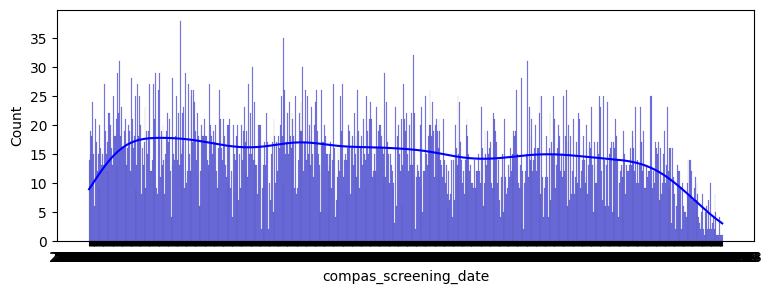

In [22]:
# Veamos su distribución por fechas
fig, ax = plt.subplots(figsize = (9, 3))
sns.histplot(compas_red,x='compas_screening_date',color='blue',kde='count')

Las fechas van desde Ene-2013 a Ene-2015.

No observamos nada anómalo. Siguiente columna:

##### Columna 'sex':

In [23]:
describe_columna(compas_red,'sex')

Columna: sex  -  Tipo de datos: object
Número de valores nulos: 0  -  Número de valores distintos: 2
Valores más frecuentes:
Male 	 8388
Female 	 2185


En este caso lo único que debemos hacer es cambiar el tipo de dato a categórico:

In [24]:
compas_red.sex=compas_red.sex.astype('category')

<Axes: xlabel='sex', ylabel='count'>

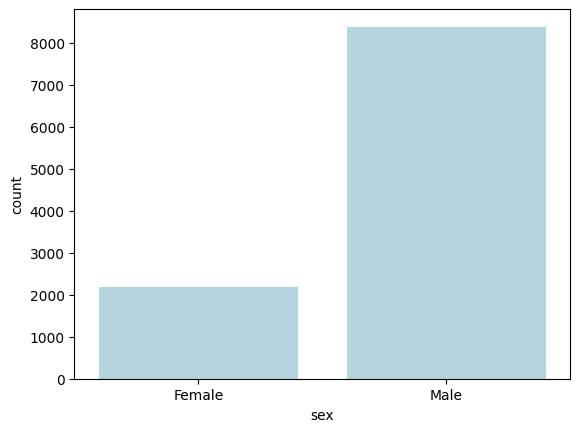

In [25]:
sns.countplot(x=compas_red.sex,color='lightblue')

Pasamos a la siguiente columna.

##### Columna 'age':

In [26]:
describe_columna(compas_red,'age')

Columna: age  -  Tipo de datos: int64
Número de valores nulos: 0  -  Número de valores distintos: 65
Valores más frecuentes:
24 	 482
26 	 480
23 	 470
25 	 470
22 	 465
27 	 459
21 	 456
29 	 404
30 	 397
28 	 392


<Axes: xlabel='age', ylabel='Count'>

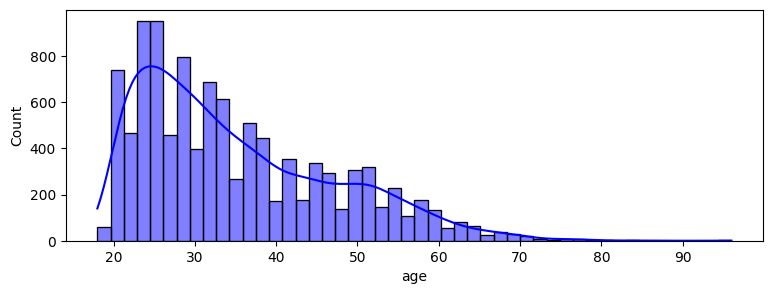

In [27]:
fig, ax = plt.subplots(figsize = (9, 3))
sns.histplot(data=compas_red,x='age',color='blue',kde='count')

Ningún problema detectado. Pasamos a la siguiente columna.

##### Columna 'race':

In [28]:
describe_columna(compas_red,'race')

Columna: race  -  Tipo de datos: object
Número de valores nulos: 0  -  Número de valores distintos: 6
Valores más frecuentes:
African-American 	 5236
Caucasian 	 3637
Hispanic 	 981
Other 	 632
Asian 	 53
Native American 	 34


In [29]:
# Cambiamos el tipo de datos a categórico:
compas_red.race=compas_red.race.astype('category')

<Axes: xlabel='race', ylabel='count'>

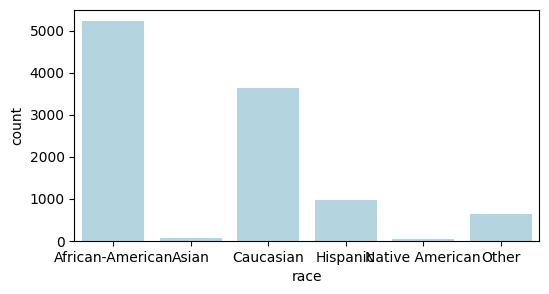

In [30]:
fig, ax = plt.subplots(figsize = (6, 3))
sns.countplot(x=compas_red.race,color='lightblue')

Pasamos a la siguiente columna:

##### Columna 'decile_score':

In [31]:
describe_columna(compas_red,'decile_score')

Columna: decile_score  -  Tipo de datos: int64
Número de valores nulos: 0  -  Número de valores distintos: 11
Valores más frecuentes:
1 	 2417
2 	 1440
3 	 1147
4 	 1073
5 	 923
6 	 879
7 	 786
8 	 694
9 	 685
10 	 515


<Axes: xlabel='decile_score', ylabel='count'>

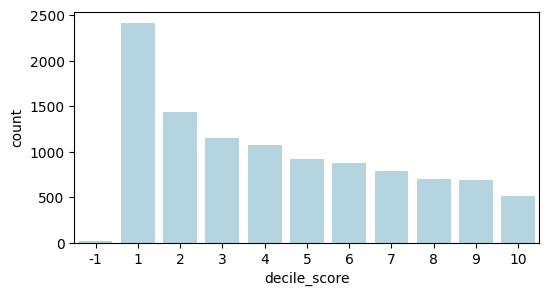

In [32]:
fig, ax = plt.subplots(figsize = (6, 3))
sns.countplot(x=compas_red.decile_score,color='lightblue')

In [33]:
# Calculamos el número de casos en los que sucede esto:
len(compas_red[compas_red.decile_score==-1])

14

Detectamos un posible problema de validez de los datos de algunos registros en los que el riesgo de reincidencia es -1, cuando la regla es que son valores entre 1 y 10.

In [34]:
compas_red[compas_red.decile_score==-1].describe(include='all')

,id,compas_screening_date,sex,age,race,decile_score,is_recid,r_offense_date,v_decile_score,is_violent_recid,vr_offense_date
count,14.000000,14,14,14.000000,14,14.0,14.000000,2,14.000000,14.0,0
unique,NaN,13,2,NaN,3,NaN,NaN,2,NaN,NaN,0
top,NaN,2014-10-16,Male,NaN,Caucasian,NaN,NaN,2015-01-12,NaN,NaN,NaN
freq,NaN,2,10,NaN,7,NaN,NaN,1,NaN,NaN,NaN
mean,6119.571429,NaN,NaN,45.714286,NaN,-1.0,-0.142857,NaN,2.500000,0.0,NaN
std,3978.194773,NaN,NaN,15.424399,NaN,0.0,0.662994,NaN,2.980707,0.0,NaN
min,29.000000,NaN,NaN,21.000000,NaN,-1.0,-1.000000,NaN,-1.000000,0.0,NaN
25%,3198.000000,NaN,NaN,31.500000,NaN,-1.0,-0.750000,NaN,-0.500000,0.0,NaN
50%,6707.500000,NaN,NaN,50.500000,NaN,-1.0,0.000000,NaN,2.000000,0.0,NaN
75%,9018.750000,NaN,NaN,60.000000,NaN,-1.0,0.000000,NaN,5.000000,0.0,NaN


Tras visualizar estos casos, suponemos que los 14 registros son erróneos y procedemos a eliminarlos:

In [35]:
# Eliminamos los registros:
compas_red.drop(compas_red[compas_red.decile_score==-1].index,inplace=True)
# Reseteamos indices
compas_red=compas_red.reset_index(drop=True)

In [36]:
# Comprobamos que se han eliminado correctamente:
len(compas_red[compas_red.decile_score<1])

0

Pasamos a la siguiente columna:

##### Columna 'is_recid':

In [37]:
describe_columna(compas_red,'is_recid')

Columna: is_recid  -  Tipo de datos: int64
Número de valores nulos: 0  -  Número de valores distintos: 3
Valores más frecuentes:
0 	 6590
1 	 3257
-1 	 712


Vemos que hay 712 registros con valor -1 lo que no cumple la regla de validez para esta variable binaria cuyos valores únicos posibles son 0 y 1.

In [38]:
# Filtramos los elementos con "is_recid" igual a -1
compas_red[compas_red.is_recid==-1]

,id,compas_screening_date,sex,age,race,decile_score,is_recid,r_offense_date,v_decile_score,is_violent_recid,vr_offense_date
1,2,2014-12-31,Male,31,Caucasian,5,-1,NaN,2,0,NaN
32,36,2013-03-04,Female,49,Caucasian,1,-1,NaN,1,0,NaN
41,46,2013-02-26,Male,29,Caucasian,8,-1,NaN,6,0,NaN
52,58,2013-04-15,Male,36,African-American,1,-1,NaN,1,0,NaN
98,109,2014-08-14,Male,41,African-American,2,-1,NaN,1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10498,11687,2013-11-10,Male,56,Caucasian,1,-1,NaN,1,0,NaN
10500,11690,2014-09-20,Male,25,Caucasian,9,-1,NaN,4,0,NaN
10505,11696,2014-09-30,Male,59,African-American,3,-1,NaN,3,0,NaN
10522,11715,2013-03-23,Female,52,African-American,10,-1,NaN,6,0,NaN


Vamos a revisar el dataframe en bruto para analizar posibles causas:

In [39]:
# Filtramos por "is_recid" con valores -1 en el dataframe en bruto, visualizando las columnas relevantes a esta comprobación:
is_recid_neg=data[data.is_recid==-1]\
    [['c_charge_degree','c_charge_desc','is_recid', 'num_r_cases','r_case_number', 'r_charge_degree', 'r_days_from_arrest','r_offense_date', 'r_charge_desc','decile_score']]\
    .sort_values(by='c_charge_degree')
is_recid_neg

,c_charge_degree,c_charge_desc,is_recid,num_r_cases,r_case_number,r_charge_degree,r_days_from_arrest,r_offense_date,r_charge_desc,decile_score
7427,M,arrest case no charge,-1,NaN,NaN,O,NaN,NaN,NaN,1
1,O,NaN,-1,NaN,NaN,O,NaN,NaN,NaN,5
7953,O,NaN,-1,NaN,NaN,O,NaN,NaN,NaN,1
7956,O,NaN,-1,NaN,NaN,O,NaN,NaN,NaN,1
7979,O,NaN,-1,NaN,NaN,O,NaN,NaN,NaN,3
...,...,...,...,...,...,...,...,...,...,...
4130,O,NaN,-1,NaN,NaN,O,NaN,NaN,NaN,7
4137,O,NaN,-1,NaN,NaN,O,NaN,NaN,NaN,4
4146,O,NaN,-1,NaN,NaN,O,NaN,NaN,NaN,6
3927,O,NaN,-1,NaN,NaN,O,NaN,NaN,NaN,2


In [40]:
# Vemos una descripción de los registros con "is_recid" -1
is_recid_neg.describe(include='all')

,c_charge_degree,c_charge_desc,is_recid,num_r_cases,r_case_number,r_charge_degree,r_days_from_arrest,r_offense_date,r_charge_desc,decile_score
count,719,1,719.0,0.0,0,719,0.0,0,0,719.000000
unique,2,1,NaN,NaN,0,1,NaN,0,0,NaN
top,O,arrest case no charge,NaN,NaN,NaN,O,NaN,NaN,NaN,NaN
freq,718,1,NaN,NaN,NaN,719,NaN,NaN,NaN,NaN
mean,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,3.833102
std,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2.828420
min,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,-1.000000
25%,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
50%,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,3.000000
75%,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,6.000000


In [41]:
# Hacemos una agrupación a través de los distintos valores de "is_recid" para hacer un conteo del número de registros
# en las columnas de interés en el datafame con los datos en bruto:
is_recid_neg2=data.groupby(['is_recid'])[['c_charge_degree','c_charge_desc','is_recid', 'num_r_cases',
                                                'r_case_number', 'r_charge_degree', 'r_days_from_arrest',
                                                'r_offense_date', 'r_charge_desc','decile_score']].count()
is_recid_neg2

,c_charge_degree,c_charge_desc,is_recid,num_r_cases,r_case_number,r_charge_degree,r_days_from_arrest,r_offense_date,r_charge_desc,decile_score
is_recid,,,,,,,,,,
-1,719,1,719,0,0,719,0,0,0,719
0,7335,7325,7335,0,0,7335,0,0,0,7335
1,3703,3682,3703,0,3703,3703,2460,3703,3643,3703


Vemos que en los casos con valor -1 en "is_recid" no hay datos sobre reincidencia ni grado ni descripción del cargo en COMPAS, etc. Son valores faltantes y no vamos a considerar estos registros en nuestro estudio.

In [42]:
# Eliminamos los casos con "is_recid" igual a -1
compas_red.drop(compas_red[compas_red.is_recid == -1].index,inplace=True)
compas_red=compas_red.reset_index(drop=True)

En segundo lugar transformamos el tipo de datos de la variable a categórico:

In [43]:
compas_red.is_recid=compas_red.is_recid.astype('category')

In [44]:
# Comprobamos que las modificaciones se han hecho correctamente
describe_columna(compas_red,'is_recid')

Columna: is_recid  -  Tipo de datos: category
Número de valores nulos: 0  -  Número de valores distintos: 2
Valores más frecuentes:
0 	 6590
1 	 3257


Pasamos a la siguiente columna:

##### Columna 'r_offense_date':

In [45]:
describe_columna(compas_red,'r_offense_date')

Columna: r_offense_date  -  Tipo de datos: object
Número de valores nulos: 6590  -  Número de valores distintos: 1063
Valores más frecuentes:
2014-12-08 	 12
2015-02-10 	 10
2014-06-07 	 10
2015-01-28 	 10
2014-04-03 	 10
2014-06-05 	 10
2015-03-11 	 9
2014-07-28 	 9
2014-05-02 	 9
2014-06-26 	 9


Analizamos que casuistica tienen los nulos de esta variable.

In [46]:
nulos_r_offense_date=compas_red[compas_red.r_offense_date.isnull()==True]
nulos_r_offense_date

,id,compas_screening_date,sex,age,race,decile_score,is_recid,r_offense_date,v_decile_score,is_violent_recid,vr_offense_date
0,1,2013-08-14,Male,69,Other,1,0,NaN,1,0,NaN
3,5,2013-01-13,Male,23,African-American,8,0,NaN,6,0,NaN
4,6,2013-03-26,Male,43,Other,1,0,NaN,1,0,NaN
5,7,2013-11-30,Male,44,Other,1,0,NaN,1,0,NaN
7,9,2013-08-30,Male,43,Other,4,0,NaN,3,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9840,11750,2014-03-20,Male,56,African-American,1,0,NaN,1,0,NaN
9841,11751,2014-03-04,Male,44,Hispanic,1,0,NaN,1,0,NaN
9843,11753,2013-09-22,Male,47,Other,3,0,NaN,1,0,NaN
9845,11755,2014-10-08,Male,35,Other,4,0,NaN,3,0,NaN


In [47]:
# Visualizamos los valores de is_recid en este conjunto de datos
nulos_r_offense_date.is_recid.value_counts()

0    6590
1       0
Name: is_recid, dtype: int64

Como hemos comprobado los nulos de esta variable son casos en los que la persona no es reicidente, como era lógico. Por tanto debemos contemplar estos casos en nuestro estudio.

<Axes: xlabel='r_offense_date', ylabel='Count'>

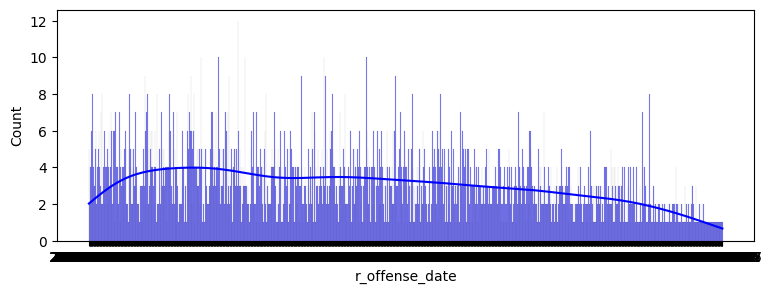

In [48]:
# Veamos su distribución por fechas
fig, ax = plt.subplots(figsize = (9, 3))
sns.histplot(compas_red,x='r_offense_date',color='blue',kde='count')

No observamos ningún problema de calidad de datos en esta columna. Pasamos a la siguiente:

##### Columna 'v_decile_score'

In [49]:
describe_columna(compas_red,'v_decile_score')

Columna: v_decile_score  -  Tipo de datos: int64
Número de valores nulos: 0  -  Número de valores distintos: 10
Valores más frecuentes:
1 	 2841
2 	 1505
3 	 1329
4 	 1047
5 	 904
6 	 750
7 	 561
8 	 393
9 	 363
10 	 154


<Axes: xlabel='v_decile_score', ylabel='count'>

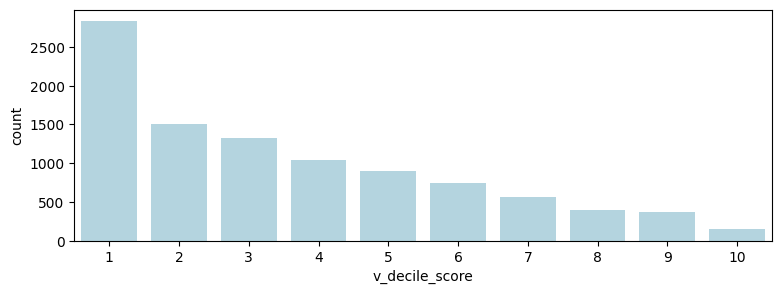

In [50]:
fig, ax = plt.subplots(figsize = (9, 3))
sns.countplot(x=compas_red.v_decile_score,color='lightblue')

No se detecta ningún potencial problema de calidad de datos en esta columna. Pasamos a la su¡iguiente:

##### Columna 'is_violent_recid':

In [51]:
describe_columna(compas_red,'is_violent_recid')

Columna: is_violent_recid  -  Tipo de datos: int64
Número de valores nulos: 0  -  Número de valores distintos: 2
Valores más frecuentes:
0 	 9084
1 	 763


In [52]:
# Convertimos el tipo de datos a categórico
compas_red.is_violent_recid=compas_red.is_violent_recid.astype('category')

Siguiente columna:

##### Columna 'vr_offense_date':

In [53]:
describe_columna(compas_red,'vr_offense_date')

Columna: vr_offense_date  -  Tipo de datos: object
Número de valores nulos: 9084  -  Número de valores distintos: 538
Valores más frecuentes:
2015-08-15 	 5
2014-07-28 	 4
2015-04-27 	 4
2014-12-26 	 4
2015-09-04 	 4
2015-10-14 	 4
2013-11-14 	 4
2015-06-13 	 4
2014-09-28 	 4
2014-04-05 	 4


Para analizar los nulos hacemos el mismo análisis que en la variable 'r_offense_date':

In [54]:
nulos_vr_offense_date=compas_red[compas_red.vr_offense_date.isnull()==True]
nulos_vr_offense_date

,id,compas_screening_date,sex,age,race,decile_score,is_recid,r_offense_date,v_decile_score,is_violent_recid,vr_offense_date
0,1,2013-08-14,Male,69,Other,1,0,NaN,1,0,NaN
2,4,2013-04-14,Male,24,African-American,4,1,2013-06-16,3,0,NaN
3,5,2013-01-13,Male,23,African-American,8,0,NaN,6,0,NaN
4,6,2013-03-26,Male,43,Other,1,0,NaN,1,0,NaN
5,7,2013-11-30,Male,44,Other,1,0,NaN,1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9842,11752,2013-02-27,Male,63,African-American,1,1,2013-03-27,1,0,NaN
9843,11753,2013-09-22,Male,47,Other,3,0,NaN,1,0,NaN
9844,11754,2013-05-17,Male,22,Caucasian,7,1,2014-10-11,5,0,NaN
9845,11755,2014-10-08,Male,35,Other,4,0,NaN,3,0,NaN


In [55]:
# Visualizamos los valores de is_recid en este conjunto de datos
nulos_vr_offense_date.is_violent_recid.value_counts()

0    9084
1       0
Name: is_violent_recid, dtype: int64

De igual forma hemos comprobado que los nulos de esta variable son casos en los que la persona no es reicidente en un delito violente, como era lógico. Por tanto debemos contemplar estos casos en nuestro estudio.

<Axes: xlabel='vr_offense_date', ylabel='Count'>

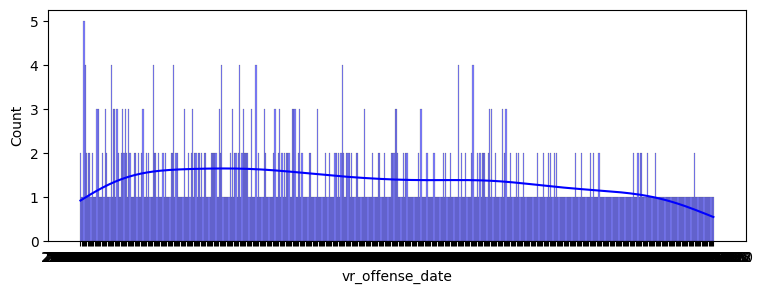

In [56]:
# Veamos su distribución por fechas
fig, ax = plt.subplots(figsize = (9, 3))
sns.histplot(compas_red,x='vr_offense_date',color='blue',kde='count')

No observamos ningún problema de calidad en esta variable. Pasamos a la siguiente:

#### Valoración de la actualidad de los datos:

Veamos hasta que fecha tenemos casos de la evaluación COMPAS

<Axes: xlabel='compas_screening_date', ylabel='Count'>

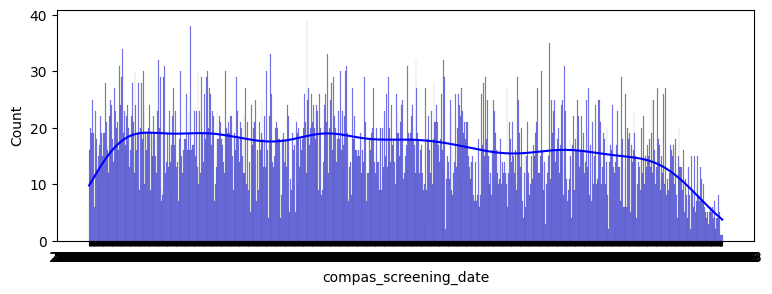

In [57]:
# Veamos su distribución por fechas
fig, ax = plt.subplots(figsize = (9, 3))
sns.histplot(data,x='compas_screening_date',color='blue',kde='count')

Como vemos en el histograma anterior no tenemos fechas de evaluación COMPAS de delicuentes más recientes de Enero de 2015. No es posible sacar conclusiones de cualquier estudio con esos datos más allá de esta fecha. Si se quieren obtener conclusiones que fueran más lejos de estas fechas tendríamos un problema de actualidad de los datos y requeriríamos adquirir nuevos.

### 2. Definición de una feature para evaluar la precisión de las estimaciones de riesgo generadas por el sistema COMPAS.

Según informa la empresa fuente de los datos (ProPúplica) en su informe metodológico: "para la mayor parte de nuestro análisis, definimos la reincidencia como un nuevo arresto dentro de dos años. Basamos esta decisión en la guía para profesionales de Northpointe, que dice que su puntaje de reincidencia está destinado a predecir" un nuevo delito menor o delito mayor dentro de los dos años de la COMPAS fecha de administración."

Por tanto, en ambos campos, no deberían ser considerados los casos con valores iguales a 1 (personas reeincidentes en la realidad) en los que el tiempo pasado desde la evaluación COMPAS hasta la fecha de reincidencia fuera mayor de 2 años. No sería correcto introducir estos casos a la hora de evaluar la precisión de las estimaciones de riesgo generadas por COMPAS, ya que se considerarían como reincidentes casos que no fueron contemplados en la definición del modelo creado por Northpointe.
Como features podemos crear 2 nuevas variables, una para cada tipo de reincidencia (general/violenta) en la que se computen como reincidentes (valor 1) solo los casos en los que el tiempo entre fechas sea menor o igual a 2 años. El resto será no reincidente.

Anteriormente vamos a comprobar que realmente es necesario esto, viendo si los casos con valores de reincidencia igual a 1 tienen diferencias entre fechas superiores a 2 años.

In [59]:
# 'r_offense_date', 'vr_offense_date' y 'compas_screening_date' son columnas de fecha en formato de cadena
compas_red['r_offense_date'] = pd.to_datetime(compas_red['r_offense_date'])
compas_red['vr_offense_date'] = pd.to_datetime(compas_red['vr_offense_date'])
compas_red['compas_screening_date'] = pd.to_datetime(compas_red['compas_screening_date'])

# Creamos 2 nuevas features a partir de la diferencia entre las fechas de reincidencia y la de evaluación COMPAS (en años):
compas_red['tiempo_reincidencia_g'] = (compas_red['r_offense_date'] - compas_red['compas_screening_date']).dt.days /365
compas_red['tiempo_reincidencia_v'] = (compas_red['vr_offense_date'] - compas_red['compas_screening_date']).dt.days /365

In [60]:
#Visualizamos dataframe resultante:
compas_red.head(3)

,id,compas_screening_date,sex,age,race,decile_score,is_recid,r_offense_date,v_decile_score,is_violent_recid,vr_offense_date,tiempo_reincidencia_g,tiempo_reincidencia_v
0,1,2013-08-14,Male,69,Other,1,0,NaT,1,0,NaT,NaN,NaN
1,3,2013-01-27,Male,34,African-American,3,1,2013-07-05,1,1,2013-07-05,0.435616,0.435616
2,4,2013-04-14,Male,24,African-American,4,1,2013-06-16,3,0,NaT,0.172603,NaN


In [61]:
# Comprobamos el número de casos que no cumplen el criterio de reincidencia general
len(compas_red[(compas_red.is_recid==1) & (compas_red.tiempo_reincidencia_g > 2)])

240

In [62]:
# Comprobamos el número de casos que no cumplen el criterio de reincidencia violenta
len(compas_red[(compas_red.is_violent_recid==1) & (compas_red.tiempo_reincidencia_v > 2)])

101

Efectivamente hay 240 casos de nuevos arrestos por motivos generales y 101 por violentos tras más de 2 años desde la fecha de evaluación COMPAS y por tanto el valor de reincidencia debería ser 0 y no 1.

In [63]:
# Introducimos 2 nuevas features en el dataframe adecuadas para evaluar la precisión de las estimaciones de riesgo generadas por COMPAS
compas_red['reincidente_g']=np.where(((compas_red.is_recid==1) & (compas_red.tiempo_reincidencia_g<=2)),1,0)
compas_red['reincidente_v']=np.where(((compas_red.is_violent_recid==1) & (compas_red.tiempo_reincidencia_v<=2)),1,0)

In [64]:
compas_red.head()

,id,compas_screening_date,sex,age,race,decile_score,is_recid,r_offense_date,v_decile_score,is_violent_recid,vr_offense_date,tiempo_reincidencia_g,tiempo_reincidencia_v,reincidente_g,reincidente_v
0,1,2013-08-14,Male,69,Other,1,0,NaT,1,0,NaT,NaN,NaN,0,0
1,3,2013-01-27,Male,34,African-American,3,1,2013-07-05,1,1,2013-07-05,0.435616,0.435616,1,1
2,4,2013-04-14,Male,24,African-American,4,1,2013-06-16,3,0,NaT,0.172603,NaN,1,0
3,5,2013-01-13,Male,23,African-American,8,0,NaT,6,0,NaT,NaN,NaN,0,0
4,6,2013-03-26,Male,43,Other,1,0,NaT,1,0,NaT,NaN,NaN,0,0


In [65]:
# Cruzamos los casos según los campos "is_recid" y el nevo "reincidente_g"
pd.crosstab(compas_red.is_recid,compas_red.reincidente_g)

reincidente_g,0,1
is_recid,,
0,6590,0
1,240,3017


En la nueva feature "reincidente_g" ya no son unos los 240 casos que no cumplían el requisito de tiempo entre evaluación COMPAS y reincidencia.

In [66]:
# Cruzamos os casos según los campos "is_violent_recid" y el nevo "reincidente_v"
pd.crosstab(compas_red.is_violent_recid,compas_red.reincidente_v)

reincidente_v,0,1
is_violent_recid,,
0,9084,0
1,101,662


En la nueva feature "reincidente_v" ya no son unos los 101 casos que no cumplían el requisito de tiempo entre evaluación COMPAS y reincidencia.

In [67]:
# Comprobemos si la feature "reincidente_g" es correcta:
compas_red.groupby(['reincidente_g','is_recid'])['tiempo_reincidencia_g'].max().unstack()

is_recid,0,1
reincidente_g,,
0,NaN,3.189041
1,NaN,2.000000


In [68]:
# Comprobemos si la otra feature "reincidente_v" es correcta:
compas_red.groupby(['reincidente_v','is_violent_recid'])['tiempo_reincidencia_v'].max().unstack()

is_violent_recid,0,1
reincidente_v,,
0,NaN,3.169863
1,NaN,2.000000


Vemos que los valores de 1 para las nuevas features solo se producen si los compos de reincidencia antiguos son 1 y el valor máximo de los tiempos 2 años, luego cumplen las reglas.

In [69]:
# Revisemos las nuevas features generadas:
describe_columna(compas_red,'tiempo_reincidencia_g')

Columna: tiempo_reincidencia_g  -  Tipo de datos: float64
Número de valores nulos: 6590  -  Número de valores distintos: 834
Valores más frecuentes:
0.057534246575342465 	 17
0.06575342465753424 	 16
0.024657534246575342 	 16
0.010958904109589041 	 15
0.0547945205479452 	 14
0.01643835616438356 	 14
0.03561643835616438 	 14
0.0958904109589041 	 14
0.11506849315068493 	 14
0.019178082191780823 	 14


<Axes: xlabel='tiempo_reincidencia_g', ylabel='Count'>

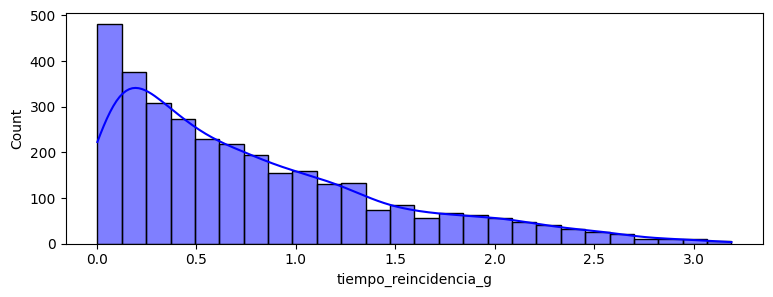

In [70]:
# Veamos su histograma:
fig, ax = plt.subplots(figsize = (9, 3))
sns.histplot(compas_red,x='tiempo_reincidencia_g',color='blue',kde='count')

In [71]:
# Revisamos que los casos nulos del tiempo de reincidencia general se correponde con casos de o reincidencia:
compas_red[compas_red.tiempo_reincidencia_g.isnull()==True]['is_recid'].value_counts()

0    6590
1       0
Name: is_recid, dtype: int64

In [72]:
# Describimos el campo "tiempo_reincidencia_v":
describe_columna(compas_red,'tiempo_reincidencia_v')

Columna: tiempo_reincidencia_v  -  Tipo de datos: float64
Número de valores nulos: 9084  -  Número de valores distintos: 521
Valores más frecuentes:
0.3150684931506849 	 6
0.41643835616438357 	 6
0.6876712328767123 	 5
0.28493150684931506 	 5
0.1780821917808219 	 5
0.0821917808219178 	 5
1.1369863013698631 	 4
0.0684931506849315 	 4
0.3726027397260274 	 4
0.6356164383561644 	 4


<Axes: xlabel='tiempo_reincidencia_v', ylabel='Count'>

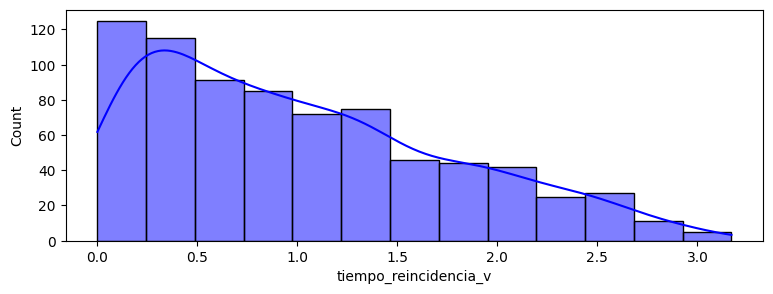

In [73]:
# Veamos su histograma:
fig, ax = plt.subplots(figsize = (9, 3))
sns.histplot(compas_red,x='tiempo_reincidencia_v',color='blue',kde='count')

In [74]:
# Revisamos que los casos nulos del tiempo de reincidencia violenta se correponde con casos de no reincidencia:
compas_red[compas_red.tiempo_reincidencia_v.isnull()==True]['is_violent_recid'].value_counts()

0    9084
1       0
Name: is_violent_recid, dtype: int64

In [75]:
# Describimos el campo "reincidente_g"
describe_columna(compas_red,'reincidente_g')

Columna: reincidente_g  -  Tipo de datos: int64
Número de valores nulos: 0  -  Número de valores distintos: 2
Valores más frecuentes:
0 	 6830
1 	 3017


In [76]:
# Pasamos a tipo de dato categorico
compas_red.reincidente_g=compas_red.reincidente_g.astype('category')

In [77]:
# Describimos el campo "reincidente_v"
describe_columna(compas_red,'reincidente_v')

Columna: reincidente_v  -  Tipo de datos: int64
Número de valores nulos: 0  -  Número de valores distintos: 2
Valores más frecuentes:
0 	 9185
1 	 662


In [78]:
# Pasamos a tipo de dato categorico
compas_red.reincidente_v=compas_red.reincidente_v.astype('category')

### 3. Creación de una tabla de contingencia y obtención de errores tipo I y tipo II teniendo en cuenta que el umbral para establecer medidas preventivas de la reincidencia es de 7 en adelante.

En primer lugar y para entender visulmente que representa el umbral en el caso en cuestión, vamos a generar unos gráficos en los que se muestran los histogramas de distribución de las evaluaciones del riesgo de reincidencia (escala del 1 al 10, maenor a mayor riesgo), tanto para el conjunto de casos que no reincidieron en la realidad como para los que si lo hicieron, según ambos tipos de reincidencia (general / violenta).

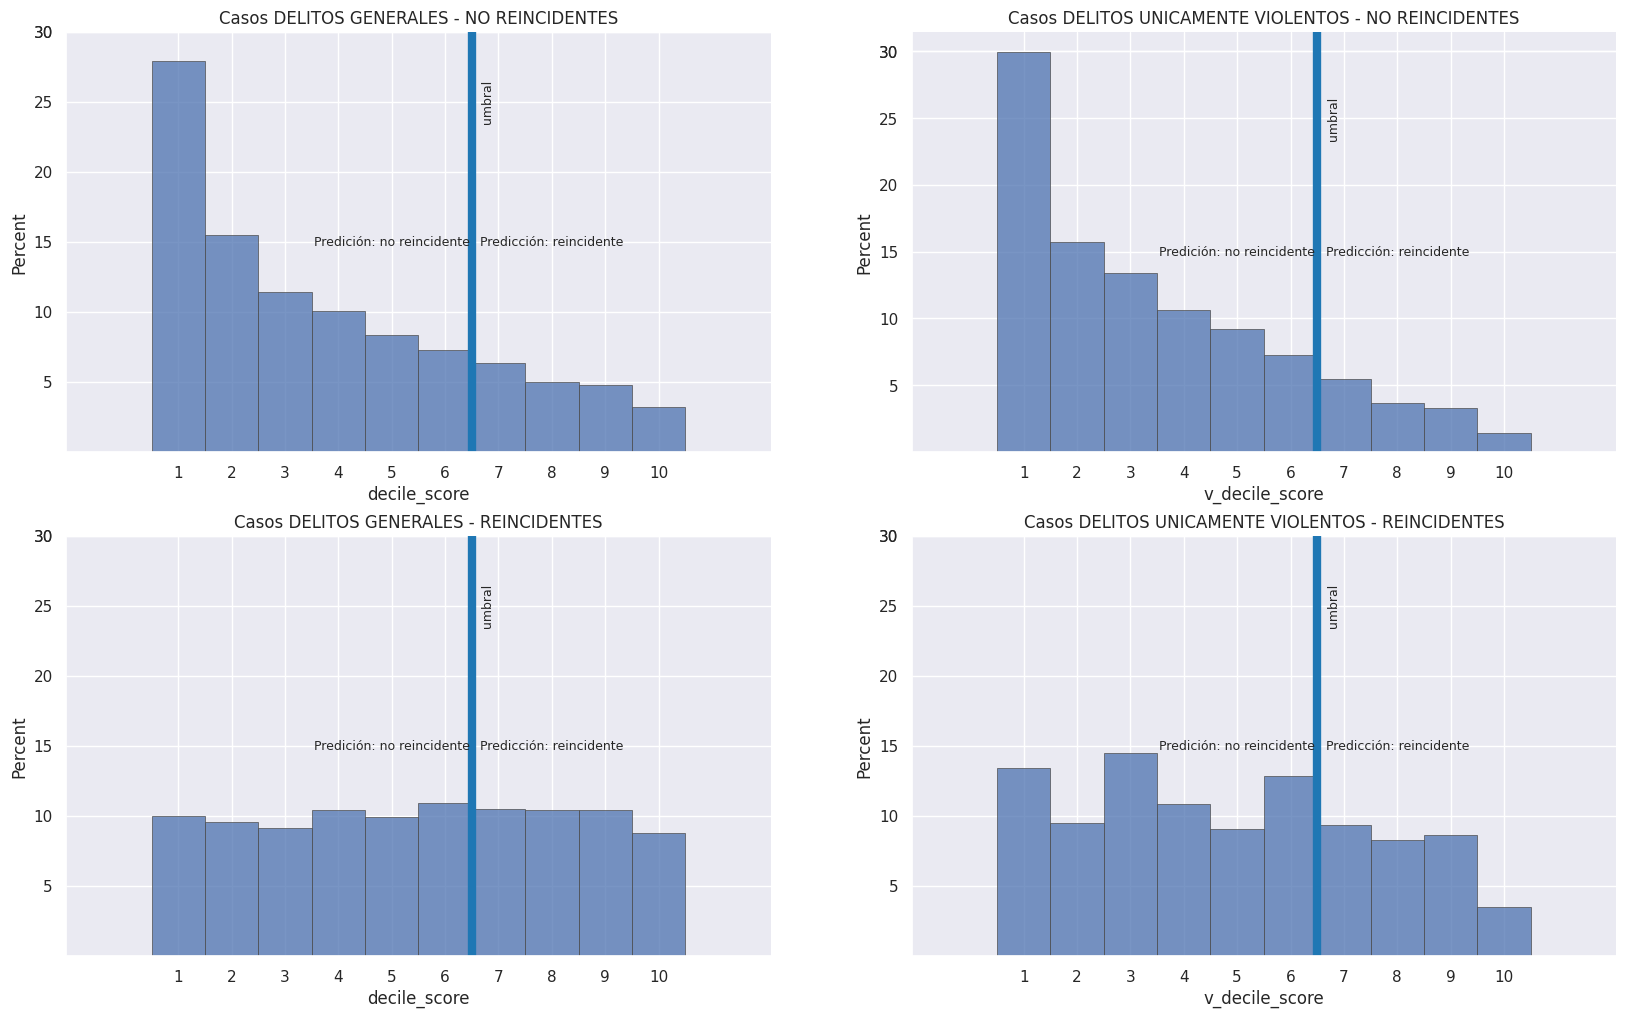

In [79]:
# Generamos graficos mediante funciones:
sns.set_theme(style="ticks")
sns.set_style("darkgrid")
f, axs = plt.subplots(2,2,figsize=(20, 12))
sns.despine(f)

def grafico_compas(tipo_reincidencia, reincidencia,score,posicion):
    return sns.histplot(data=compas_red[tipo_reincidencia==reincidencia],
                        x=score,multiple="stack",stat='percent',binrange=(0,11),discrete=True,
                        edgecolor=".3",linewidth=0.5,palette="coolwarm",ax=posicion)

grafico_compas(compas_red.reincidente_g,0,'decile_score',axs[0,0])
grafico_compas(compas_red.reincidente_g,1,'decile_score',axs[1,0])
grafico_compas(compas_red.reincidente_v,0,'v_decile_score',axs[0,1])
grafico_compas(compas_red.reincidente_v,1,'v_decile_score',axs[1,1])

def complementos_graficos(posicion,titulo):
    posicion.set_title(titulo)
    posicion.text(5,15,'Predición: no reincidente',size=9,rotation=0,ha='center',va='center',wrap=True)
    posicion.text(8,15,'Predicción: reincidente',size=9,rotation=0,ha='center',va='center')
    posicion.text(6.8,25,'umbral',size=9,rotation=90,ha='center',va='center')

complementos_graficos(axs[0,0],'Casos DELITOS GENERALES - NO REINCIDENTES')
complementos_graficos(axs[1,0],'Casos DELITOS GENERALES - REINCIDENTES')
complementos_graficos(axs[0,1],'Casos DELITOS UNICAMENTE VIOLENTOS - NO REINCIDENTES')
complementos_graficos(axs[1,1],'Casos DELITOS UNICAMENTE VIOLENTOS - REINCIDENTES')

for ax in (axs[0,0],axs[1,0],axs[0,1],axs[1,1]):
    ax.set_xticks([1,2,3,4,5,6,7,8,9,10])
    ax.set_yticks([5,10,15,20,25,30,30])
    ax.axvline(x=6.5,linewidth=6, color='#1f77b4')

Podemos ver que si el umbral se moviera a valores más altos en la escala:

    1. cometeríamos menos errores en la predicción del tipo clasificar como reincidentes a no reincidentes (gráficos superiores).
    2. cometeríamos más errores en la predicción del tipo clasificar como no reincidentes a delicuentes que si iban a serlo (gráficos inferiores).
    
Una vez revisados estos conceptos, vamos a crear 2 nuevas features. Se tratan de clasificadores binarios para los resultados de la predicción de COMPAS para ambos tipos de delitos considerados en el estudio. Posteriormente compararemos sus valores con la realidad a través de las tablas de contingencia y las métricas típicas correspondientes:

In [80]:
# Creamos 2 nuevos campos en el dataframe con los valores de predicción de reincidencia (0:no reincidente, 1:reincidente),
# tanto general como violenta, a partir de las valoraciones del riesgo de COMPAS. Se considera como umbral de 7 en adelante.
# Se considera como positivo que la persona sea reincidente y negativo no reincidente.

compas_red['reincidente_g_pred']=np.where(compas_red.decile_score>=7,1,0)
compas_red['reincidente_v_pred']=np.where(compas_red.v_decile_score>=7,1,0)

In [81]:
# Describimos el nuevo campo:
describe_columna(compas_red,'reincidente_g_pred')

Columna: reincidente_g_pred  -  Tipo de datos: int64
Número de valores nulos: 0  -  Número de valores distintos: 2
Valores más frecuentes:
0 	 7314
1 	 2533


In [82]:
# Describimos el otro nuevo campo:
describe_columna(compas_red,'reincidente_v_pred')

Columna: reincidente_v_pred  -  Tipo de datos: int64
Número de valores nulos: 0  -  Número de valores distintos: 2
Valores más frecuentes:
0 	 8376
1 	 1471


In [83]:
# Convertimos las nuevas features a tipo de dato categorico:
compas_red[['reincidente_g_pred','reincidente_v_pred']]=compas_red[['reincidente_g_pred','reincidente_v_pred']].astype('category')

Comprobamos que sucede en los casos límite con las mayores valoraciones según la escala COMPAS:

In [84]:
# Creamos un diccionario con la comparación de los campos de interés en los casos con valores máximos de la escala:
compas_red[['reincidente_g_pred','reincidente_g','decile_score']].loc[compas_red.decile_score.nlargest(6).index.tolist()].to_dict()

{'reincidente_g_pred': {9: 1, 19: 1, 33: 1, 39: 1, 56: 1, 76: 1},
 'reincidente_g': {9: 0, 19: 0, 33: 1, 39: 0, 56: 1, 76: 1},
 'decile_score': {9: 10, 19: 10, 33: 10, 39: 10, 56: 10, 76: 10}}

Mostrando los 6 valores con la mayor valoración de riesgo de reincidencia de tipo general vemos:

    - Todos tienen un 10 de valor en la escala de reincidencia.
    - Con umbral 7, predice reincidencia en todos los casos.
    - Sin embargo, solo acierta en 3 de los 6 casos, tras contrastar la predicción con la realidad.

In [85]:
# Lo mismo para valores mínimos de la escala
compas_red[['reincidente_g_pred','reincidente_g','decile_score']].loc[compas_red.decile_score.nsmallest(6).index.tolist()].to_dict()

{'reincidente_g_pred': {0: 0, 4: 0, 5: 0, 8: 0, 13: 0, 16: 0},
 'reincidente_g': {0: 0, 4: 0, 5: 0, 8: 0, 13: 0, 16: 1},
 'decile_score': {0: 1, 4: 1, 5: 1, 8: 1, 13: 1, 16: 1}}

Mostrando los 6 valores con la menor valoración de riesgo de reincidencia de tipo general vemos:

    - Todos tienen un 1 de valor en la escala de reincidencia.
    - Con umbral 7, predice no reincidencia en todos los casos.
    - Acierta en todos los casos menos en 1, tras contrastar la predicción con la realidad.

En una primera observación sin detalle, parece que predice mucho mejor los casos en los que el resutado de la evaluación fue riesgo de reincidencia menor. El número de fallos parece elevado. Veamos las tablas de contingencia y las métricas necesarias para evaluar la capacidad predictiva:

In [86]:
# Obtenemos las tablas de contingencia para ambos tipos de reincidencia general:
tc_g=pd.crosstab(compas_red.reincidente_g_pred,compas_red.reincidente_g)

In [87]:
# Visualiamos tabla de contingencia para la predicciónd de reincidencia general
tc_g

reincidente_g,0,1
reincidente_g_pred,,
0,5506,1808
1,1324,1209


Hemos considerado como positivo de nuestro clasificador los unos. Resulta:

    - Errores tipo I (Falsos positivos): 1324 casos
    - Errores tipo II (Falsos negativos): 1808 casos
    
La proporción de errores parece alta y no parece que el modelo tenga buena capacidad predictiva. Lo vemos a través de las métricas de clasificación binaria típicas. En apartados posteriormente se hará una descripción más detallada de estos resultados.

In [88]:
# Creamos una función para calcular las métricas:
def metricas (verdaderos_positivos,verdaderos_negativos,falsos_positivos,falsos_negativos):
    lista=[]
    sensibilidad = round(verdaderos_positivos / (verdaderos_positivos + falsos_negativos),3)
    especificidad = round(verdaderos_negativos/ (verdaderos_negativos + falsos_positivos),3)
    TFP= round(falsos_positivos / (falsos_positivos + verdaderos_negativos),3)
    TFN= round(falsos_negativos / (falsos_negativos + verdaderos_positivos),3)
    precision = round(verdaderos_positivos / (verdaderos_positivos + falsos_positivos),3)
    exactitud= round((verdaderos_positivos+verdaderos_negativos)/(verdaderos_positivos + falsos_negativos + verdaderos_negativos + falsos_positivos),3)
    F_score=round(2*(precision*sensibilidad)/(precision+sensibilidad),3)
    lista=[sensibilidad,especificidad,TFP,TFN,precision,exactitud,F_score]
    return lista

In [89]:
# Calculo de verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos de la reincidencia general
vp=tc_g.unstack()[1,1]
vn=tc_g.unstack()[0,0]
fp=tc_g.unstack()[0,1]
fn=tc_g.unstack()[1,0]

In [90]:
# Resultados de las métricas
# (sensibilidad,especificidad,TFP,TFN,precisión,exactitud,F-score)
metricas(vp,vn,fp,fn)

[0.401, 0.806, 0.194, 0.599, 0.477, 0.682, 0.436]

In [91]:
# Con scikit-learn usamos la función específica para generar las métricas de clasificación a partir de los
# casos reales y las predicciones

from sklearn.metrics import classification_report

# Métricas para reincidencia de tipo general:
print(classification_report(compas_red.reincidente_g, compas_red.reincidente_g_pred, digits = 3))

              precision    recall  f1-score   support

           0      0.753     0.806     0.779      6830
           1      0.477     0.401     0.436      3017

    accuracy                          0.682      9847
   macro avg      0.615     0.603     0.607      9847
weighted avg      0.668     0.682     0.674      9847



In [92]:
from sklearn.metrics import roc_auc_score

In [93]:
# Calculamos el area bajo la curva ROC (AUC_ROC) para ver la capacidad predictiva del modelo,
# para delitos en general:
AUC_ROC_g=roc_auc_score((compas_red.reincidente_g == 1), compas_red.reincidente_g_pred)
AUC_ROC_g

0.6034392711676293

In [94]:
# Obtenemos las tablas de contingencia para ambos tipos de reincidencia reincidencia violenta:
tc_v=pd.crosstab(compas_red.reincidente_v_pred,compas_red.reincidente_v)

In [95]:
# Visualiamos tabla de contingencia para la predicciónd de reincidencia violenta
tc_v

reincidente_v,0,1
reincidente_v_pred,,
0,7911,465
1,1274,197


In [96]:
# Obtenemos los valores de la tabla de contingencia de reincidencia violenta
rv_vp=tc_v.unstack()[1,1]
rv_vn=tc_v.unstack()[0,0]
rv_fp=tc_v.unstack()[0,1]
rv_fn=tc_v.unstack()[1,0]

Hemos considerado como positivo de nuestro clasificador los unos. Resulta:

    - Errores tipo I (Falsos positivos): 1274 casos
    - Errores tipo II (Falsos negativos): 465 casos
    
La proporción de errores parece alta y no parece que el modelo tenga buena capacidad predictiva. Veamoslo a través de las métricas de clasificación binaria típicas:

In [97]:
# Calculamos las métricas :
metricas(rv_vp,rv_vn,rv_fp,rv_fn)

[0.298, 0.861, 0.139, 0.702, 0.134, 0.823, 0.185]

In [98]:
# Métricas para reicidencia de tipo violento calculadas por scikit-learn:
print(classification_report(compas_red.reincidente_v, compas_red.reincidente_v_pred, digits = 3))

              precision    recall  f1-score   support

           0      0.944     0.861     0.901      9185
           1      0.134     0.298     0.185       662

    accuracy                          0.823      9847
   macro avg      0.539     0.579     0.543      9847
weighted avg      0.890     0.823     0.853      9847



In [99]:
# Calculamos el area bajo la curva ROC (AUC_ROC) para ver la capacidad predictiva del modelo,
# para delitos con violencia:
AUC_ROC_v=roc_auc_score((compas_red.reincidente_v == 1), compas_red.reincidente_v_pred)
AUC_ROC_v

0.5794393361039525

A priori no parece un muy buenos clasificadores, pero sería interesante comparar su capacidad predictiva con la que consiguen los profesionales que se dedican a hacer este trabajo de evaluación de presos, ya que a pesar de no tener unos buenos resultados en las métricas de capacidad predictiva puede ser útil como consulta en los procesos de revisión de los delicuentes.

### 4. Análisis gráfico de las diferencias en las evaluaciones de riesgo en función del género y la raza de los presos, para ver si el sistema Compas es justo o no.  


#### 4.1. Descripción general del los resultados de COMPAS por sexo y raza:

In [100]:
# Hay que tener en cuenta como se distribuyen los casos por sexo y razas:
compas_red.groupby(['sex','race'])['id'].count().unstack(0).style.background_gradient()

sex,Female,Male
race,,
African-American,939,3983
Asian,5,43
Caucasian,818,2547
Hispanic,148,743
Native American,9,21
Other,108,483


Para simplificar, normalmente vamos a comparar las razas con mayor presencia en la muestra: afroamericanos y caucásicos.

In [101]:
# Veamos como cual es el porcentaje de casos de cada raza en los distintos niveles de la escala de reincidencia COMPAS:
# para delitos generales:
compas_red.groupby(['race'])['decile_score'].value_counts(normalize=True).unstack(0).style.background_gradient()


race,African-American,Asian,Caucasian,Hispanic,Native American,Other
decile_score,,,,,,
1,0.121495,0.520833,0.301040,0.350168,0.133333,0.433164
2,0.110321,0.145833,0.153046,0.188552,0.166667,0.182741
3,0.098334,0.104167,0.120059,0.122334,0.166667,0.082910
4,0.100366,nan,0.110847,0.081930,0.133333,0.103215
5,0.095083,0.062500,0.090342,0.070707,0.033333,0.055838
6,0.101585,0.062500,0.071917,0.050505,0.133333,0.055838
7,0.103210,0.020833,0.052006,0.048260,0.066667,0.032149
8,0.095896,0.062500,0.043091,0.028058,nan,0.018613
9,0.096912,nan,0.037444,0.032548,0.066667,0.016920


In [102]:
# Veamos como cual es el porcentaje de casos de cada raza en los distintos niveles de la escala de reincidencia COMPAS:
# para delitos violentos:
compas_red.groupby(['race'])['v_decile_score'].value_counts(normalize=True).unstack(0).style.background_gradient()


race,African-American,Asian,Caucasian,Hispanic,Native American,Other
v_decile_score,,,,,,
1,0.170053,0.583333,0.400297,0.406285,0.233333,0.439932
2,0.139374,0.145833,0.167311,0.162738,0.200000,0.165821
3,0.138968,0.020833,0.135810,0.124579,0.066667,0.125212
4,0.121495,0.104167,0.094799,0.076319,0.200000,0.086294
5,0.109915,0.062500,0.072808,0.084175,0.100000,0.062606
6,0.099147,0.041667,0.053195,0.056117,0.066667,0.049069
7,0.081877,nan,0.032392,0.032548,0.033333,0.032149
8,0.058919,0.041667,0.019614,0.025814,nan,0.020305
9,0.055668,nan,0.017533,0.022447,0.100000,0.011844


Efectivamente vemos que en ambas clasificaciones de delitos, el porcentaje de afro-americanos en niveles altos es mayor que el de los caucásicos. En niveles bajos sucede al revés. También destacan los nativos americanos, pero el número de casos en la muestra de este grupo es muy pequeño y no podemos comparar con los anteriores grupos.

Veamos como se distribuyen los resultados de evaluación del riesgo de reincidencia en la escala del 1 al 10 por raza, tanto para los casos que no fueron reincidentes tras 2 años desde la evaluación como para los que si lo fueron, para ver si existe algún tipo de relación de las mejores o peores valoraciones con la raza.

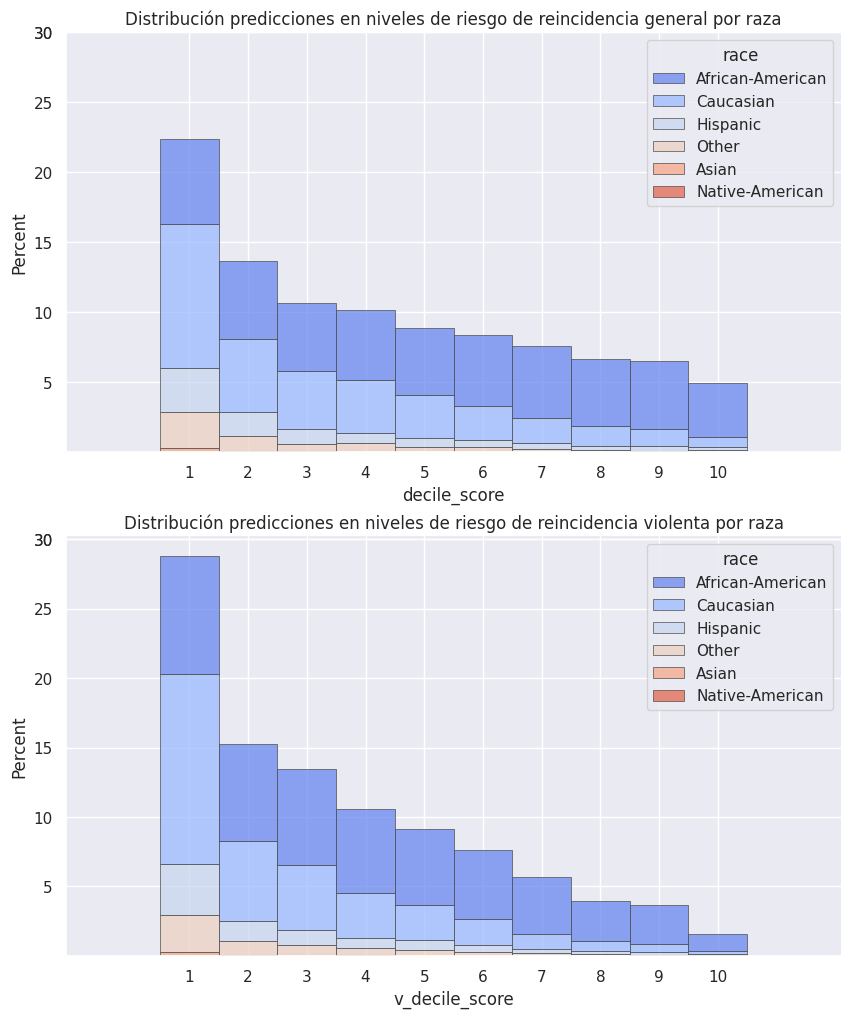

In [103]:
# Histograma para ver distribución casos en los niveles de evalaución reincidencia general por raza:

# Parámetos generales:
sns.set_theme(style="ticks")
sns.set_style("darkgrid")
f, axs = plt.subplots(2,1,figsize=(10, 12))
sns.despine(f)

# Función para generar los histogramas:
def histograma1(datos,tipo_escala,titulo,pos_graf):
    return (sns.histplot(data=datos,x=tipo_escala,hue='race',
                     hue_order=['African-American','Caucasian','Hispanic','Other','Asian','Native-American'],
                     multiple="stack", stat='percent',binrange=(0,11),discrete=True,
                     edgecolor=".3",linewidth=0.5,palette="coolwarm",ax=pos_graf),
            pos_graf.set_xticks([1,2,3,4,5,6,7,8,9,10]),
            pos_graf.set_yticks([5,10,15,20,25,30,30]),
            pos_graf.set_title(titulo))

# Generamos ambos histogramas a partir de la función:
histograma1(compas_red,'decile_score','Distribución predicciones en niveles de riesgo de reincidencia general por raza',axs[0])
histograma1(compas_red,'v_decile_score','Distribución predicciones en niveles de riesgo de reincidencia violenta por raza',axs[1])
plt.show()

Vemos en los 2 gráficos anteriores que a mayor nivel menor número de casos, pero mientras en los caucásicos el % va decreciendo en los afro-americanos no es tan evidente sobre todo en el primer gráfico en el que se engoban todos los tipos de delitos. Vamos a estudiar con detalle las diferencias entre las 2 razas mayoritarias en los datos:

In [104]:
# Creamos filtros con solo las razas predominantes en el dataframe:
afro_americanos=compas_red[compas_red.race=='African-American']
caucasicos=compas_red[compas_red.race=='Caucasian']

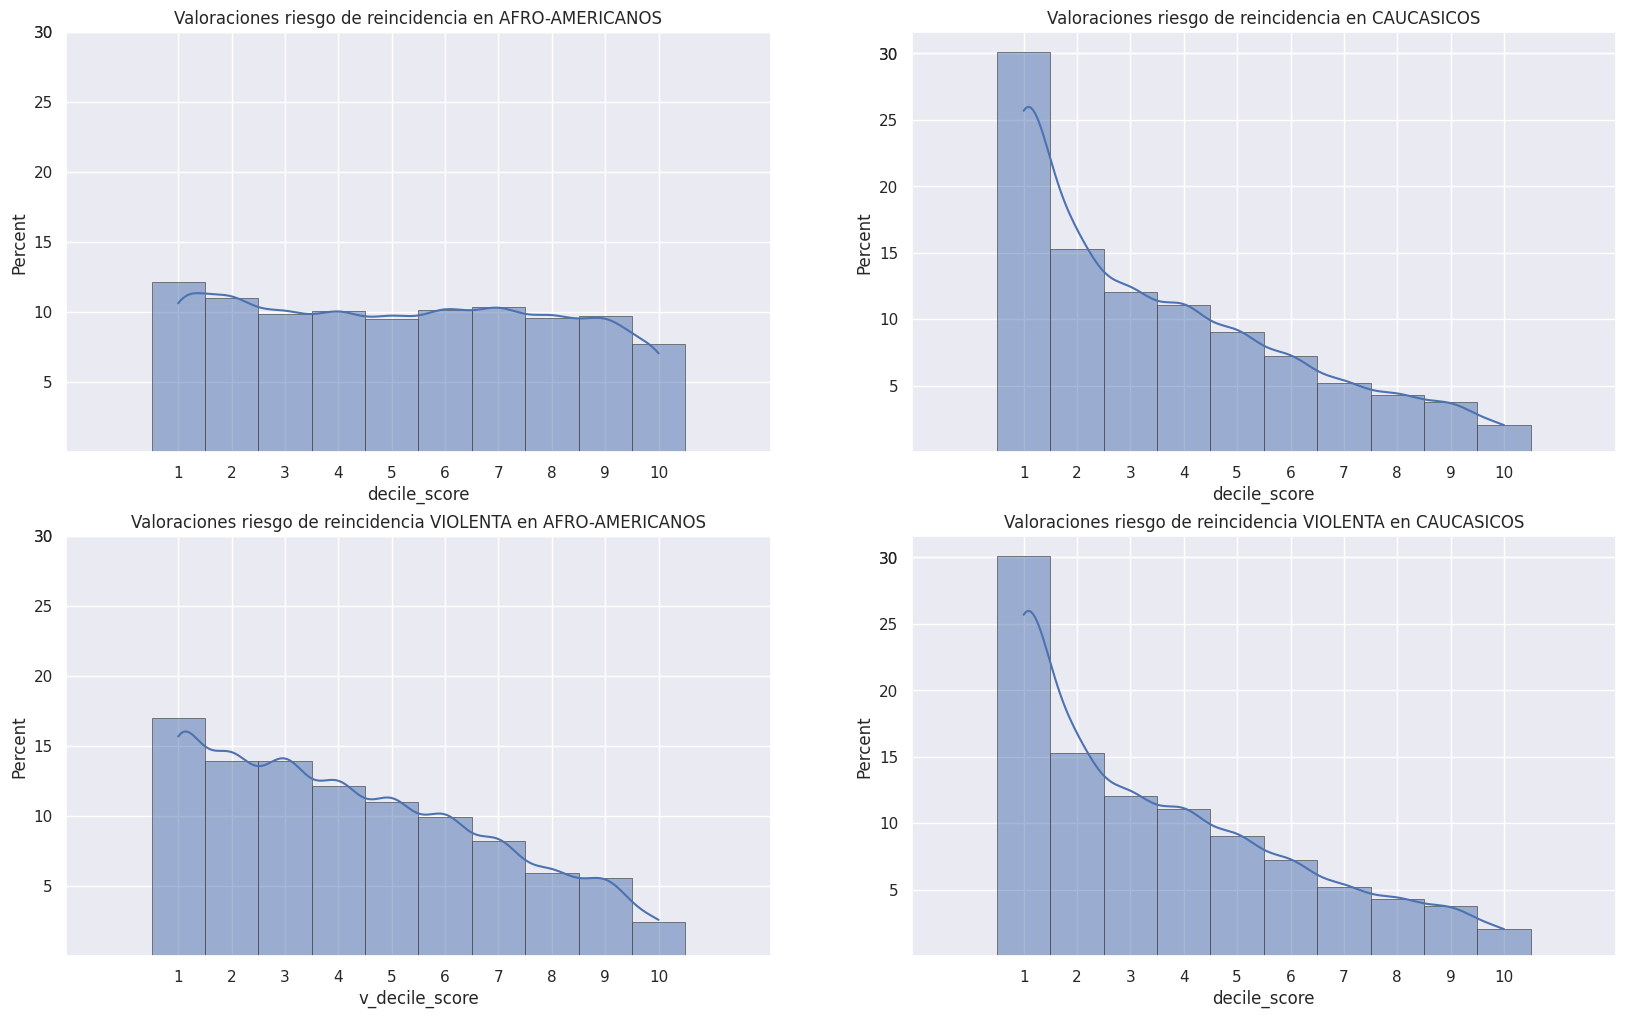

In [105]:
# Histogramas distribución casos por niveles, con solo las 2 razas predominantes:
sns.set_theme(style="ticks")
sns.set_style("darkgrid")
f, axs = plt.subplots(2,2,figsize=(20, 12))

# Nueva función:
def histograma2 (datos,tipo_delito,titulo,posicion):
    return (sns.histplot(data=datos,x=tipo_delito,stat='percent',binrange=(0,11),discrete=True,edgecolor=".3",linewidth=0.5,palette="coolwarm",kde=True,ax=posicion),
           posicion.set_xticks([1,2,3,4,5,6,7,8,9,10]),
           posicion.set_yticks([5,10,15,20,25,30,30]),
           posicion.set_title(titulo))

# Generamos los histogramas:
histograma2(afro_americanos,'decile_score','Valoraciones riesgo de reincidencia en AFRO-AMERICANOS',axs[0,0])
histograma2(afro_americanos,'v_decile_score','Valoraciones riesgo de reincidencia VIOLENTA en AFRO-AMERICANOS',axs[1,0])
histograma2(caucasicos,'decile_score','Valoraciones riesgo de reincidencia en CAUCASICOS',axs[0,1])
histograma2(caucasicos,'decile_score','Valoraciones riesgo de reincidencia VIOLENTA en CAUCASICOS',axs[1,1])
plt.show()

Centrándonos en los grupos más significativos (Afroamericanos y Caucásicos), viendo los 4 gráficos anteriores se observa la siguiente tendencia:

    1. hay más casos de  afroamericanos con peores evaluaciones (más riesgo a reincidencia)
    2. en mayor % superan el umbral de 7, y no serían candidatos a ser revisado su estado penitenciario.

Hacemos el mismo análisis gráfico por sexos:

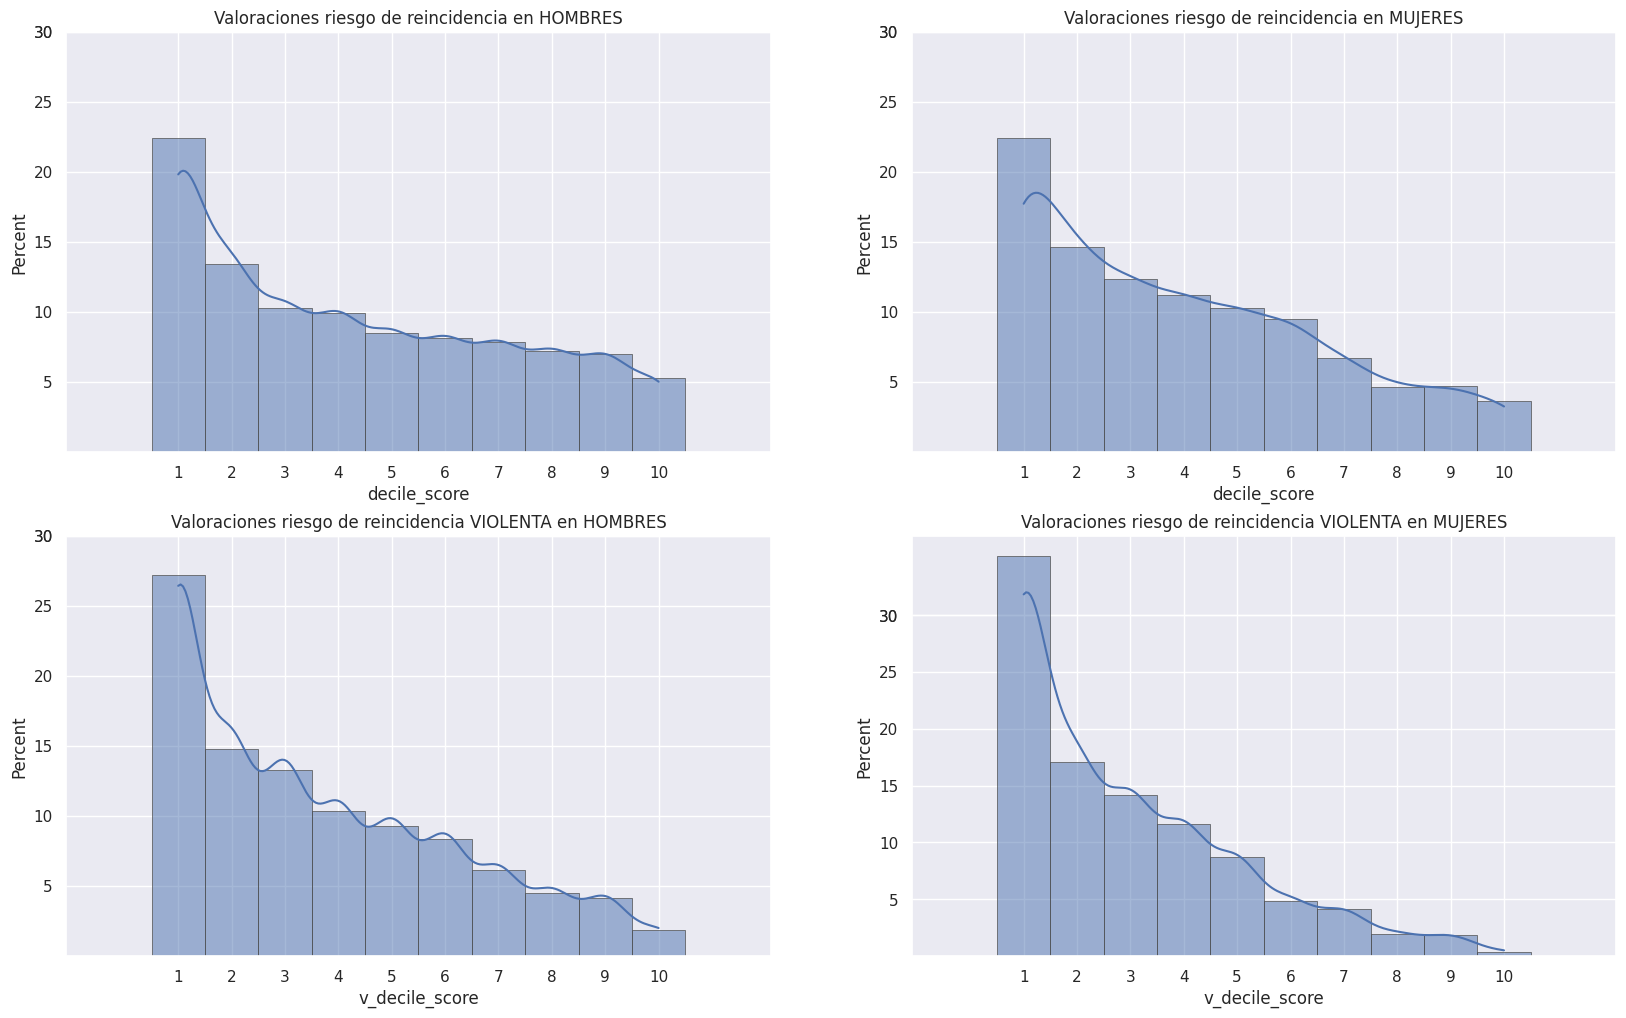

In [106]:
# Mismos histográmas pero esta vez comparando sexos:
sns.set_theme(style="ticks")
sns.set_style("darkgrid")
f, axs = plt.subplots(2,2,figsize=(20, 12))

# Generamos los histográmas a partir de la función del bloque anterior:
histograma2(compas_red[compas_red.sex=='Male'],'decile_score','Valoraciones riesgo de reincidencia en HOMBRES',axs[0,0])
histograma2(compas_red[compas_red.sex=='Male'],'v_decile_score','Valoraciones riesgo de reincidencia VIOLENTA en HOMBRES',axs[1,0],)
histograma2(compas_red[compas_red.sex=='Female'],'decile_score','Valoraciones riesgo de reincidencia en MUJERES',axs[0,1])
histograma2(compas_red[compas_red.sex=='Female'],'v_decile_score','Valoraciones riesgo de reincidencia VIOLENTA en MUJERES',axs[1,1])
plt.show()

Se observan unas mejores valoraciones en general para las mujeres. Esta tendencia es más evidente en los niveles altos de la escala de riesgo, sobre todo en reincidencia por delitos con violencia. Es evidente que los resultados son más convenientes para las mujeres.

In [107]:
# Tabulamos conjuntamente para ver el número de registros en cada nivel, por sexo y raza conjuntamente:
pd.crosstab(index=[compas_red.sex,compas_red.race],columns=compas_red.v_decile_score).style.background_gradient()

Hay que tener en cuenta que hay muchos más hombres evaluados y más de raza afroamericana como se ve en el siguiente gráfico:

Text(0.5, 1.0, 'Distribución del número de delincuentes evaluados por COMPAS (por raza y sexo)')

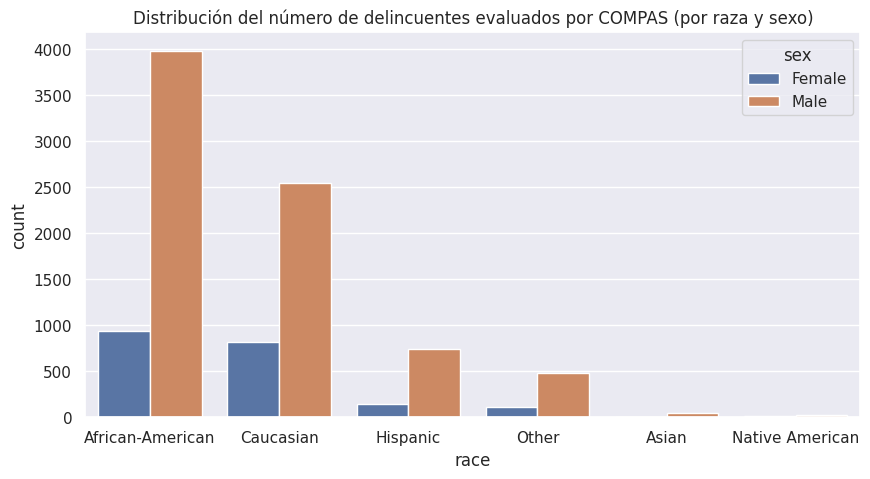

In [108]:
# Obtenemos una lista de razas ordenada según el número de casos de cada una de mayor a menor:
orden1=compas_red.groupby(['race'])['id'].count().sort_values(ascending=False).index.tolist()

# Hacemos un gráfico para ver esa distribución:
f, axs=plt.subplots(figsize=(10,5))
a=sns.countplot(data=compas_red, x='race',hue='sex',order=orden1)
a.set_title('Distribución del número de delincuentes evaluados por COMPAS (por raza y sexo)')

En este punto se nos ocurre que es interesante comparar las valoraciones medias en ambas escalas de evaluación (delitos en general y delitos violentos) obtenidas por los distintos colectivos:

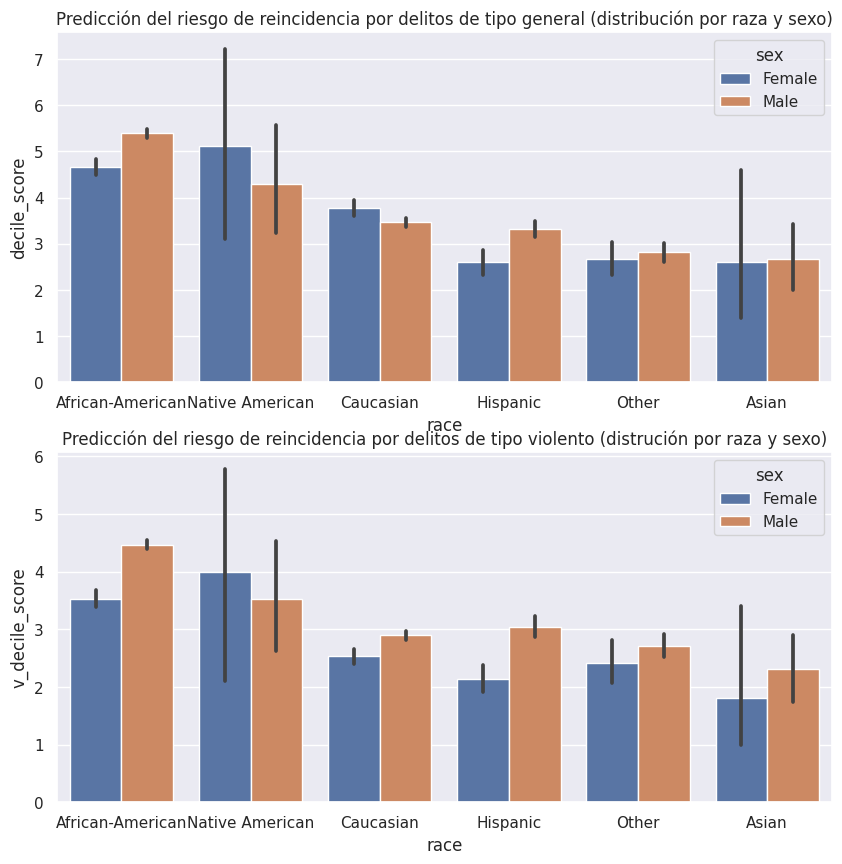

In [109]:
# Obtenemos el orden en el que mostras los gráficos de mayor a menor "nota":
orden2=compas_red.groupby(['race'])['decile_score'].mean().sort_values(ascending=False).index.tolist()

# Gráficos de barras para ver valoraciones medias obtenidas por el algoritmo
f, axs=plt.subplots(2,1,figsize=(10,10))
sns.set_style("darkgrid")
a=sns.barplot(data=compas_red, x='race', y='decile_score',hue='sex',order=orden2,ax=axs[0])
a.set_title('Predicción del riesgo de reincidencia por delitos de tipo general (distribución por raza y sexo)')
b=sns.barplot(data=compas_red, x='race', y='v_decile_score',hue='sex',order=orden2,ax=axs[1])
b.set_title('Predicción del riesgo de reincidencia por delitos de tipo violento (distrución por raza y sexo)')
plt.show()

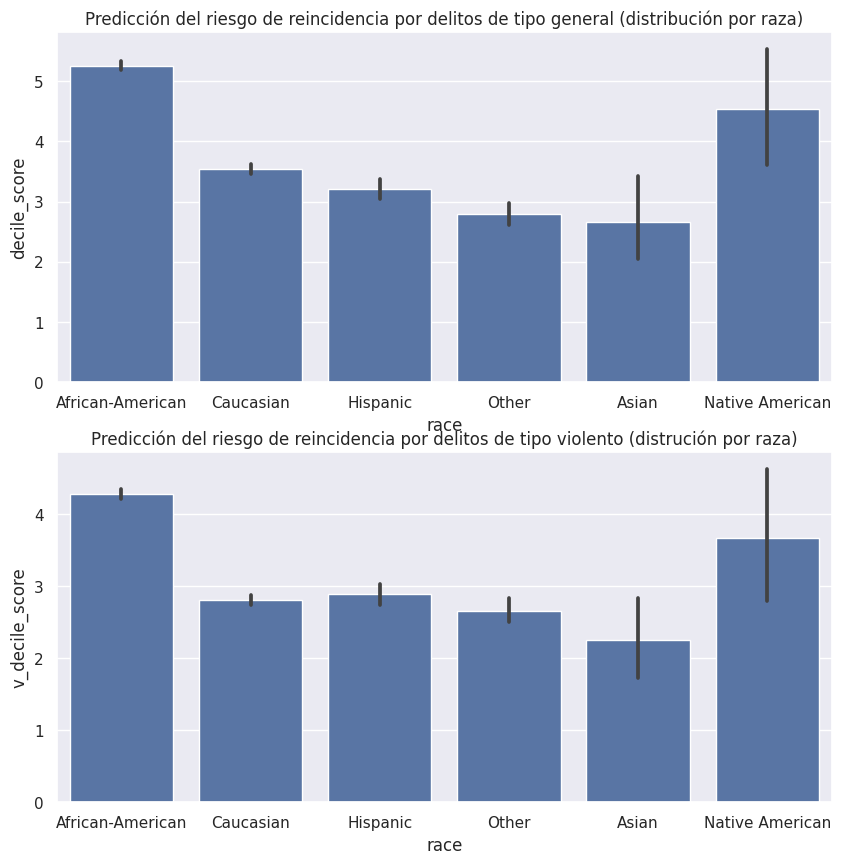

In [110]:
f, axs=plt.subplots(2,1,figsize=(10,10))
sns.set_style("darkgrid")
a=sns.barplot(data=compas_red, x='race', y='decile_score',order=orden1,ax=axs[0],color='b')
a.set_title('Predicción del riesgo de reincidencia por delitos de tipo general (distribución por raza)')
b=sns.barplot(data=compas_red, x='race', y='v_decile_score',order=orden1,ax=axs[1],color='b')
b.set_title('Predicción del riesgo de reincidencia por delitos de tipo violento (distrución por raza)')
plt.show()

En los gráficos anteriores se oberva como el valor medio del riesgo de reincidencia por ambos tipos de delito es liderado por los hombres de raza Afro-americana. Es decir el modelo de evaluación del riesgo a reincidir, COMPAS, predice un mayor riesgo para este colectivo. En algunos casos como nativos-americanos o asiáticos, la incertidumbre es elevada, lo que puede ser debido a la presencia de pocos casos para estos grupos poblacionales. Las conclusiones en estos casos hay que "cogerlas con pinzas". Veamos como se distribuyen los delicuentes evaluados en esos grupos.

Se ve claramente que dominan los hombres y las razas afro-americanas y caucásicas. Al haber muchos más datos de estos grupos, es posible que al crear el modelo de evaluación de riesgo de reincidencia se introdujera un sesgo. No tenemos datos suficientes para refutar esta hipótesis pues es también posible que la muestra tomada para crear el modelo sea representativa de la distribución de la población de ese condado y por tanto que la existencia de muchos más datos de estos grupos sea debido a su mayor tendencia a delinquir.

Evidentemente, es difícil construir una valoración del riesgo de reincidencia que no incluya elementos que puedan correlacionarse con la raza, como la pobreza, el descuido y la marginación social.
No obstante se trataba de construir un modelo que tenga la mayor capacidad predictiva posible para ayudar. Para evaluar si el sistema es injusto por precedir en contra de un determinado colectivo vamos a hacer los siguientes estudios:

    1. Comparar las tasas de reincidencia reales entre esos colectivos para ver si los grupos con resultados de la predicción más altos, reinciden más en la realidad
    2. Ver si el modelo acierta o se equivoca más con un colectivo u otro. Para ello vamos a comparar las tasas de falsos positivos y negativos por raza y sexo.

#### 4.2. Comparación tasas de incidencia reales entre colectivos:

In [111]:
# Nos quedamos solo con las razas de interés:
blancos_negros=compas_red[(compas_red.race=='African-American') | (compas_red.race=='Caucasian')].copy()

Analizamos la comparación de las tasas de reincidencia reales entre colectivos, en primer lugar para delitos generales:

In [112]:
# Convertimos el campo con el resultado de reincidencia general a integral para hacer operaciones posteriormente:
blancos_negros.reincidente_g=blancos_negros.reincidente_g.astype('int')

In [113]:
# Generamos un dataframe con agrupación por nivel de riesgo.raza-sexo y calculamos sobre la agrupación la tasa de reincidencia:
reincidentes_g_nivel=blancos_negros.groupby(['decile_score','race','sex'])['reincidente_g'].mean().rename('Tasa reincidencia general').to_frame()

In [114]:
# Resteamos indices:
reincidentes_g_nivel.reset_index(inplace=True)

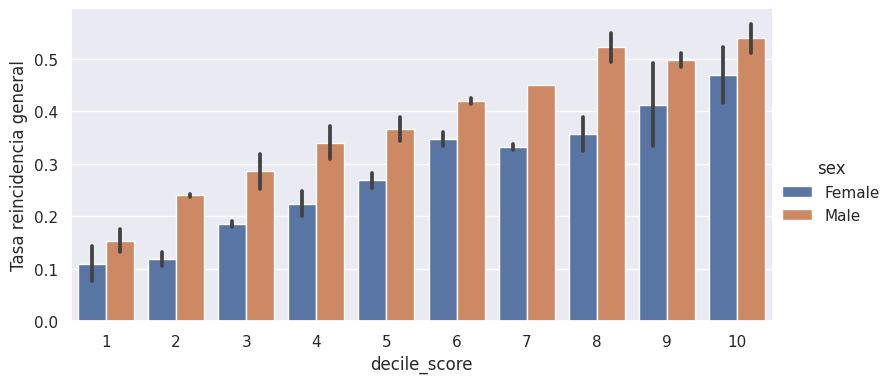

In [115]:
# Graficamos la tasa de reincidencia real en los grupos asignados a cada nivel (por sexos):
sns.catplot(data=reincidentes_g_nivel,x='decile_score',y='Tasa reincidencia general',
            hue='sex',kind='bar',height=4,aspect=2)
plt.show()

En este gráfico se ofrecen las tasas de reincidencia reales frente a la nota de evaluación del riesgo dada por COMPAS a hombres y mujeres: son más altas en hombres para todos los niveles. Veamos por razas:

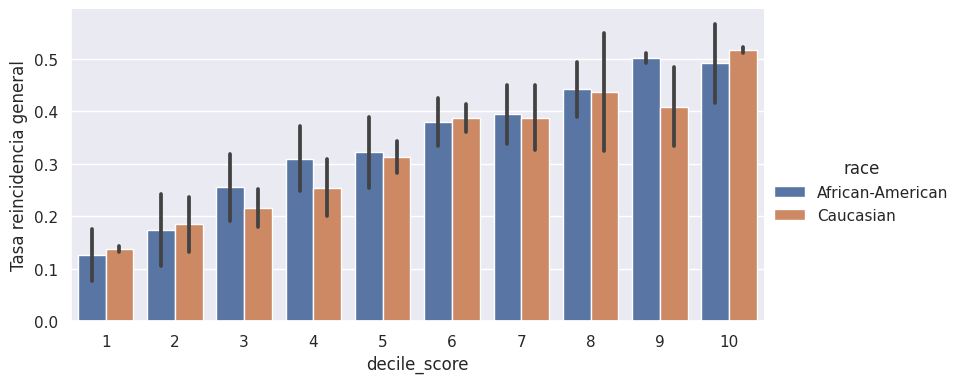

In [116]:
# El mismo gráfico pero ahora por raza:
sns.catplot(data=reincidentes_g_nivel,x='decile_score',y='Tasa reincidencia general',
            hue='race',kind='bar',height=4,aspect=2,hue_order=['African-American','Caucasian'])
plt.show()

La tasa de reincidencia es mayor en afroamericanos en todos los niveles excepto en el 2, 6 y 10.

In [117]:
# Agrupamos en 2 franjas: nivel de riesgo medio-bajo y riesgo alto:
reincidentes_g_nivel['nivel_riesgo']=np.where(reincidentes_g_nivel.decile_score<7,'medio-bajo','alto')

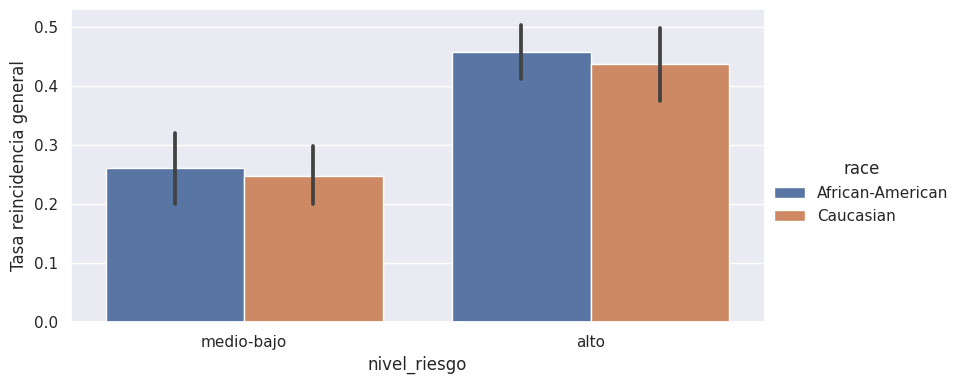

In [118]:
# Gráficamos los resultados en estos niveles:
sns.catplot(data=reincidentes_g_nivel,x='nivel_riesgo',y='Tasa reincidencia general',
            hue='race',kind='bar',height=4,aspect=2,hue_order=['African-American','Caucasian'])
plt.show()

En los niveles de riesgo de reincidencia alta (mayores o iguales a 7), los afroamericanos tienen mayor tasa de reincidencia.

Mismo análisis pero ahora para reincidencia con violencia:

In [119]:
# Convertimos campo categórico a numérico:
blancos_negros.reincidente_v=blancos_negros.reincidente_v.astype('int')

# Creamos dataframe con tasas por grupos de interés:
reincidentes_v_nivel=blancos_negros.groupby(['v_decile_score','race','sex'])['reincidente_v'].mean().rename('Tasa reincidencia violenta').to_frame()

#Reseteamos indices del dataframe:
reincidentes_v_nivel.reset_index(inplace=True)

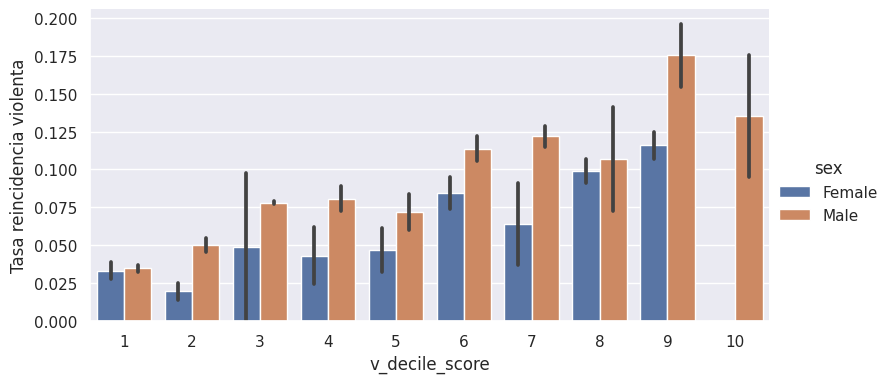

In [120]:
# Graficamos la tasa de reincidencia violenta en los grupos asignados a cada nivel (por sexos):
sns.catplot(data=reincidentes_v_nivel,x='v_decile_score',y='Tasa reincidencia violenta',
            hue='sex',kind='bar',height=4,aspect=2)
plt.show()

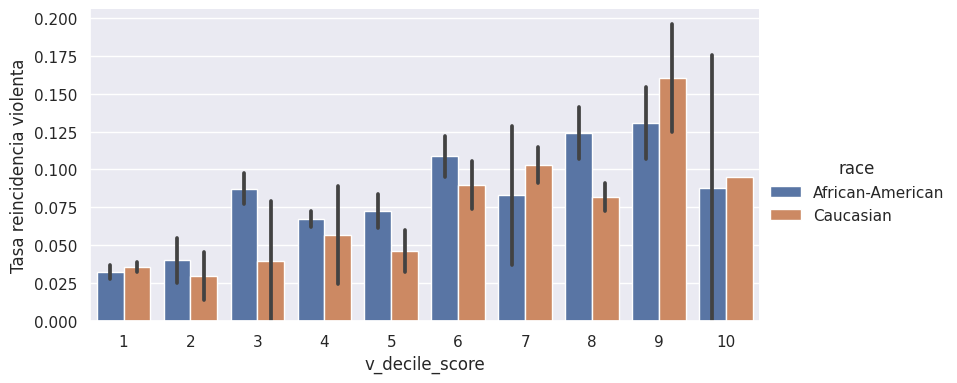

In [121]:
# El mismo gráfico pero ahora por raza:
sns.catplot(data=reincidentes_v_nivel,x='v_decile_score',y='Tasa reincidencia violenta',
            hue='race',kind='bar',height=4,aspect=2,hue_order=['African-American','Caucasian'])
plt.show()

In [122]:
# Agrupamos en 2 franjas: nivel de riesgo medio-bajo y riesgo alto:
reincidentes_v_nivel['nivel_riesgo']=np.where(reincidentes_v_nivel.v_decile_score<7,'medio-bajo','alto')

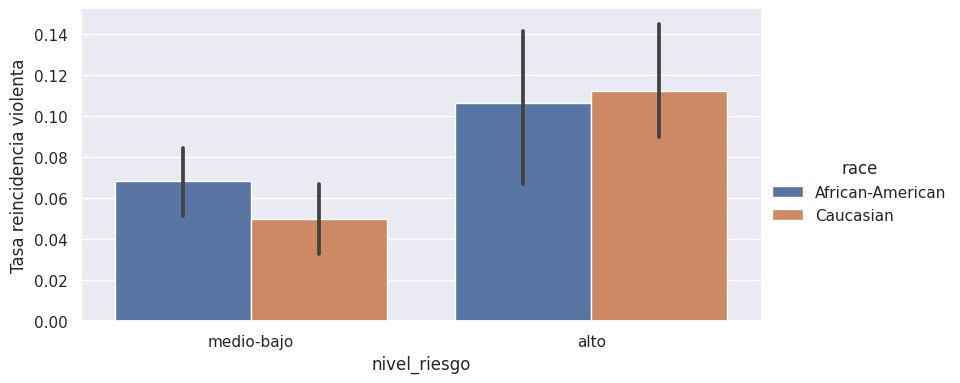

In [123]:
# Gráficamos los resultados en estos niveles:
sns.catplot(data=reincidentes_v_nivel,x='nivel_riesgo',y='Tasa reincidencia violenta',
            hue='race',kind='bar',height=4,aspect=2,hue_order=['African-American','Caucasian'])
plt.show()

En el caso de la reincidencia con violencia:

    1. las mayores tasas de reincidencia siguen siendo mayores en hombres.
    2. los afroamericanos tienen mayores tasas en casi todos los niveles.
    3. no obstante, en los niveles más altos de riesgo de reincidencia violenta la tasa es algo mayor en caucásicos.

Veamos si las niveles de riesgo de reincidencia del modelo son acertados para las tasas de reincidencia reales:

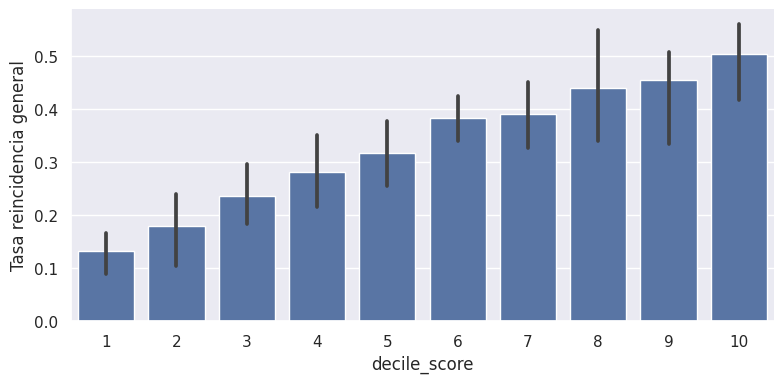

In [124]:
# Gráfico para ver relación entre la escala de evaluación del riesgo y la tasa de reincidencia general:
sns.catplot(data=reincidentes_g_nivel,x='decile_score',y='Tasa reincidencia general',kind='bar',height=4,aspect=2,color='b')
plt.show()

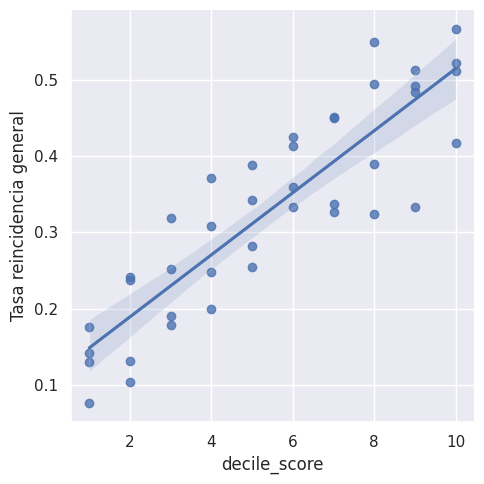

In [125]:
# Gráfico regresión lineal entre la escala de evaluación del riesgo y la tasa de reincidencia general:
sns.lmplot(data=reincidentes_g_nivel,x='decile_score',y='Tasa reincidencia general')
plt.show()

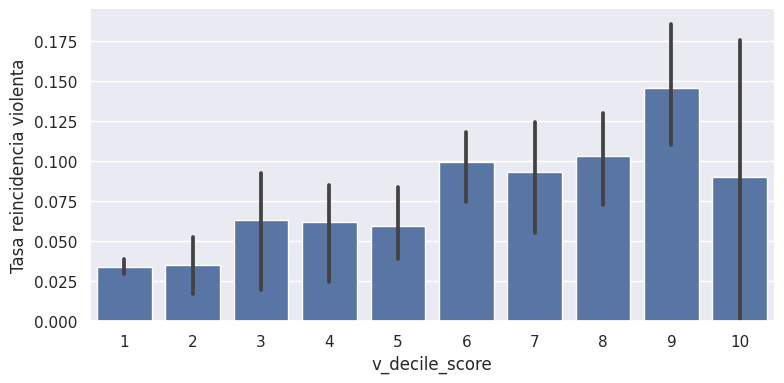

In [126]:
# Gráfico para ver relación entre la escala de evaluación del riesgo y la tasa de reincidencia violenta:
sns.catplot(data=reincidentes_v_nivel,x='v_decile_score',y='Tasa reincidencia violenta',kind='bar',height=4,aspect=2,color='b')
plt.show()

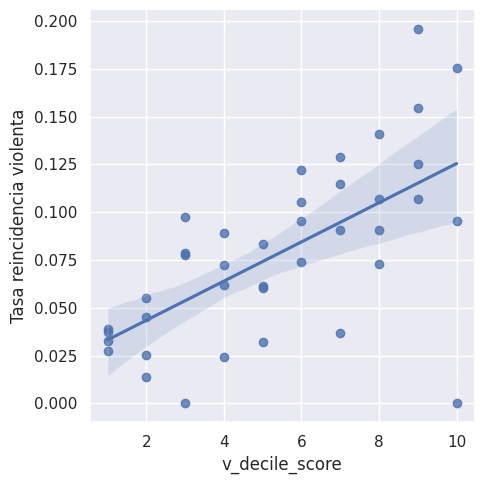

In [127]:
# Gráfico regresión lineal entre la escala de evaluación del riesgo y la tasa de reincidencia violenta:
sns.lmplot(data=reincidentes_v_nivel,x='v_decile_score',y='Tasa reincidencia violenta')
plt.show()

Vemos que los niveles para delitos en general son adecuados ya que a mayor nivel de riesgo mayor tasa de reincidencia (existe correlación), pero para reincidencia con violencia, las el valor de las tasas no es siempre creciente. En este sentido, hay que observar que el nivel de incertidumbre es elevado. Esto puede deberse al menor número de casos de reincidencia violenta y con resultados muy dispares..

Viendo todos estos estudios de la predicción y de la realidad, parece justificado en general que los hombres afroamericanos obtengan resultados de la predicción más altos en la escala de riesgo frente a las demás razas, en reincidencia por delitos de carácter general. En las predicciones de reincidencia con violencia no está tan claro que esté justificado la sensible diferencia en contra de los afroamericanos frente a los caucásicos ya que la tasa de reincidencia real es incluso peor para los caucásicos. La asignación de riesgo para reincidencia por delitos con violencia no parece correcta. Puede que esto mejore con más registros de este tipo.

#### 4.3. Comparación tasas falsos positivos y falsos negativos entre colectivos:

Vamos a ver si el modelo acierta o se equivoca más a a favor o en contra de algún colectivo:

In [128]:
# Generamos tablas de contingencia para ambas razas y tipos de reincidencia:
tc_g_negros=pd.crosstab(afro_americanos.reincidente_g_pred,afro_americanos.reincidente_g)
tc_g_blancos=pd.crosstab(caucasicos.reincidente_g_pred,caucasicos.reincidente_g)

tc_v_negros=pd.crosstab(afro_americanos.reincidente_v_pred,afro_americanos.reincidente_v)
tc_v_blancos=pd.crosstab(caucasicos.reincidente_v_pred,caucasicos.reincidente_v)

In [129]:
#  Calculamos las tasas de falsos positivos y negativos para ambas razas y tipos de reincidencia,
# a partir de función de apartado anterior:
TFP_g_negros=metricas(tc_g_negros.unstack()[1,1],tc_g_negros.unstack()[0,0],tc_g_negros.unstack()[0,1],tc_g_negros.unstack()[1,0])[2]
TFN_g_negros=metricas(tc_g_negros.unstack()[1,1],tc_g_negros.unstack()[0,0],tc_g_negros.unstack()[0,1],tc_g_negros.unstack()[1,0])[3]

TFP_g_blancos=metricas(tc_g_blancos.unstack()[1,1],tc_g_blancos.unstack()[0,0],tc_g_blancos.unstack()[0,1],tc_g_blancos.unstack()[1,0])[2]
TFN_g_blancos=metricas(tc_g_blancos.unstack()[1,1],tc_g_blancos.unstack()[0,0],tc_g_blancos.unstack()[0,1],tc_g_blancos.unstack()[1,0])[3]

TFP_v_negros=metricas(tc_v_negros.unstack()[1,1],tc_v_negros.unstack()[0,0],tc_v_negros.unstack()[0,1],tc_v_negros.unstack()[1,0])[2]
TFN_v_negros=metricas(tc_v_negros.unstack()[1,1],tc_v_negros.unstack()[0,0],tc_v_negros.unstack()[0,1],tc_v_negros.unstack()[1,0])[3]

TFP_v_blancos=metricas(tc_v_blancos.unstack()[1,1],tc_v_blancos.unstack()[0,0],tc_v_blancos.unstack()[0,1],tc_v_blancos.unstack()[1,0])[2]
TFN_v_blancos=metricas(tc_v_blancos.unstack()[1,1],tc_v_blancos.unstack()[0,0],tc_v_blancos.unstack()[0,1],tc_v_blancos.unstack()[1,0])[3]

In [130]:
# Generamos dataframe con todas las tasas por raza:
tasas_razas=pd.DataFrame(data={'African_American':[TFP_g_negros,TFP_v_negros,TFN_g_negros,TFN_v_negros],
                         'Caucasian':[TFP_g_blancos,TFP_v_blancos,TFN_g_blancos,TFN_v_blancos]})

In [131]:
# Pasamos el dataframe a formato largo:
tasas_razas=tasas_razas.melt(value_vars=['African_American','Caucasian'],var_name='race')


In [132]:
# Añadimos columna con el nombre de cada fila:
tasas_razas['rate']=['Tasa falsos positivos (reincidencia de tipo general)',
                     'Tasa falsos positivos (reincidencia violenta)',
                     'Tasa falsos negativos (reincidencia de tipo general)',
                     'Tasa falsos negativos (reincidencia violenta)',
                     'Tasa falsos positivos (reincidencia de tipo general)',
                     'Tasa falsos positivos (reincidencia violenta)',
                     'Tasa falsos negativos (reincidencia de tipo general)',
                     'Tasa falsos negativos (reincidencia violenta)']

In [133]:
# Ponemos columna rate en primer lugar:
primera_columna=tasas_razas.pop('rate')
tasas_razas.insert(0,'rate',primera_columna)

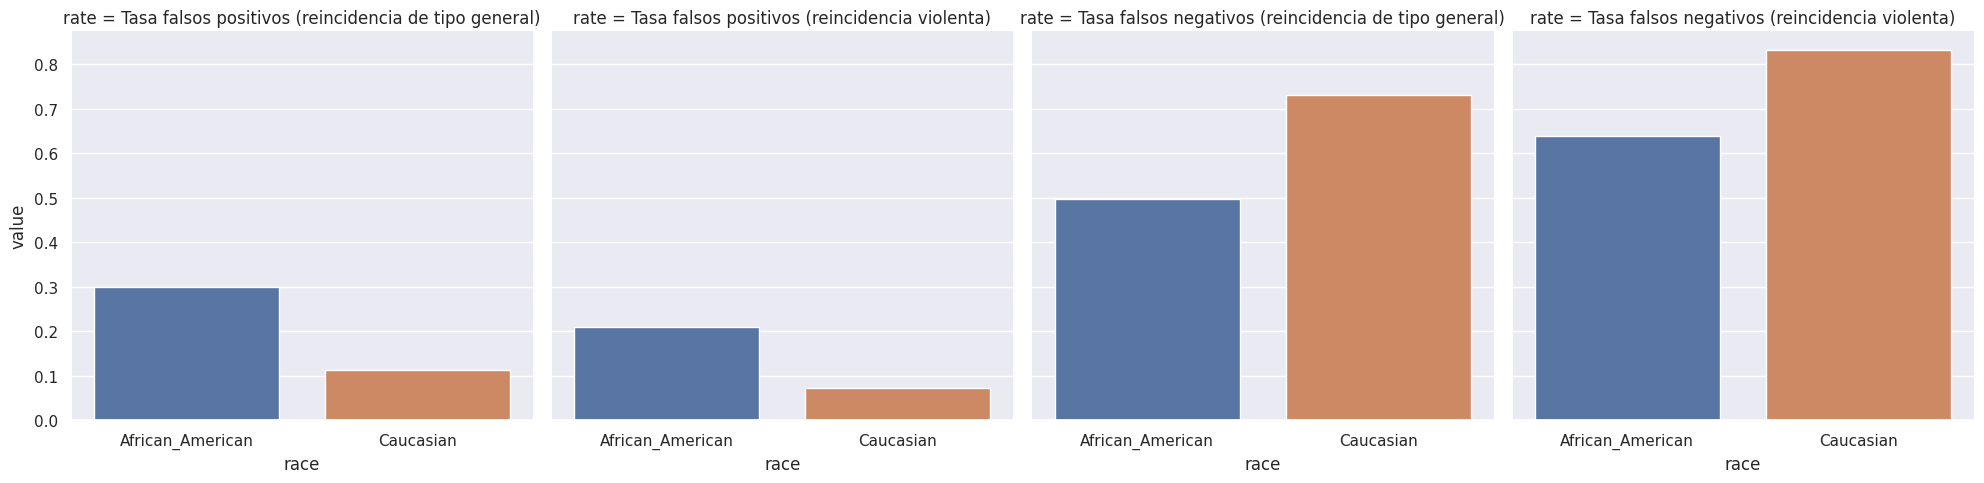

In [134]:
sns.catplot(data=tasas_razas,x='race',y='value',col='rate',kind='bar')
plt.show()

Se observa claramente como:

    - Los afroamericanos tienen mayor tasa de falsos positivos para ambas clasificaciones de reincidencia (general, y con violencia) y por tanto tienen mayor probabilidad de ser declarados como posibles reincidentes a pesar de que no iban a serlo en la realidad.
    - Los caucásicos tienen mayores tasas de falsos negativos con lo que tienen mayor probabilidad de no ser declarados como reincidentes a pesar de que si van a serlo en la realidad.
    - El algoritmo falla más hacia hacia predecir a alguien como no reincidente al ser mayor la tasa de falsos negativos que de falsos positivos.
    
Por tanto, los errores en la clasificación están algo en contra de las personas de raza afroamericana y a priori parece injusto. Habría que tener más datos sobre el proceso de recogida de los datos para realizar la muestra por parte de Propublica, para valorar si es representativa de la realidad a estudio y ver si pudiera estar sesgada para que se obtuvieran peores métricas en este grupo poblacional.


Veamos por sexo:

In [135]:
# Generamos dataframes de hombres y mujeres:
hombres=compas_red[compas_red.sex=='Male']
mujeres=compas_red[compas_red.sex=='Female']

In [136]:
# Generamos tablas de contingencia:
tc_g_hombres=pd.crosstab(hombres.reincidente_g_pred,hombres.reincidente_g)
tc_g_mujeres=pd.crosstab(mujeres.reincidente_g_pred,mujeres.reincidente_g)

tc_v_hombres=pd.crosstab(hombres.reincidente_v_pred,hombres.reincidente_v)
tc_v_mujeres=pd.crosstab(mujeres.reincidente_v_pred,mujeres.reincidente_v)

In [137]:
# Generamos tasas de falsos positivos y negativos a partir de función de métricas de apartado anterior:
TFP_g_hombres=metricas(tc_g_hombres.unstack()[1,1],tc_g_hombres.unstack()[0,0],tc_g_hombres.unstack()[0,1],tc_g_hombres.unstack()[1,0])[2]
TFN_g_hombres=metricas(tc_g_hombres.unstack()[1,1],tc_g_hombres.unstack()[0,0],tc_g_hombres.unstack()[0,1],tc_g_hombres.unstack()[1,0])[3]

TFP_g_mujeres=metricas(tc_g_mujeres.unstack()[1,1],tc_g_mujeres.unstack()[0,0],tc_g_mujeres.unstack()[0,1],tc_g_mujeres.unstack()[1,0])[2]
TFN_g_mujeres=metricas(tc_g_mujeres.unstack()[1,1],tc_g_mujeres.unstack()[0,0],tc_g_mujeres.unstack()[0,1],tc_g_mujeres.unstack()[1,0])[3]

TFP_v_hombres=metricas(tc_v_hombres.unstack()[1,1],tc_v_hombres.unstack()[0,0],tc_v_hombres.unstack()[0,1],tc_v_hombres.unstack()[1,0])[2]
TFN_v_hombres=metricas(tc_v_hombres.unstack()[1,1],tc_v_hombres.unstack()[0,0],tc_v_hombres.unstack()[0,1],tc_v_hombres.unstack()[1,0])[3]

TFP_v_mujeres=metricas(tc_g_mujeres.unstack()[1,1],tc_v_mujeres.unstack()[0,0],tc_v_mujeres.unstack()[0,1],tc_v_mujeres.unstack()[1,0])[2]
TFN_v_mujeres=metricas(tc_v_mujeres.unstack()[1,1],tc_v_mujeres.unstack()[0,0],tc_v_mujeres.unstack()[0,1],tc_v_mujeres.unstack()[1,0])[3]

In [138]:
# Generamos datadrame con las tasas
tasas_sexos=pd.DataFrame(data={'Hombres':[TFP_g_hombres,TFP_v_hombres,TFN_g_hombres,TFN_v_hombres],
                         'Mujeres':[TFP_g_mujeres,TFP_v_mujeres,TFN_g_mujeres,TFN_v_mujeres]})

In [139]:
# Pasamos el dataframe a formato largo
tasas_sexos=tasas_sexos.melt(value_vars=['Hombres','Mujeres'],var_name='sex')


In [140]:
# Añadimos al dataframe columna con el nombre de cada fila:
tasas_sexos['rate']=['Tasa falsos positivos (reincidencia de tipo general)',
                     'Tasa falsos positivos (reincidencia violenta)',
                     'Tasa falsos negativos (reincidencia de tipo general)',
                     'Tasa falsos negativos (reincidencia violenta)',
                     'Tasa falsos positivos (reincidencia de tipo general)',
                     'Tasa falsos positivos (reincidencia violenta)',
                     'Tasa falsos negativos (reincidencia de tipo general)',
                     'Tasa falsos negativos (reincidencia violenta)']

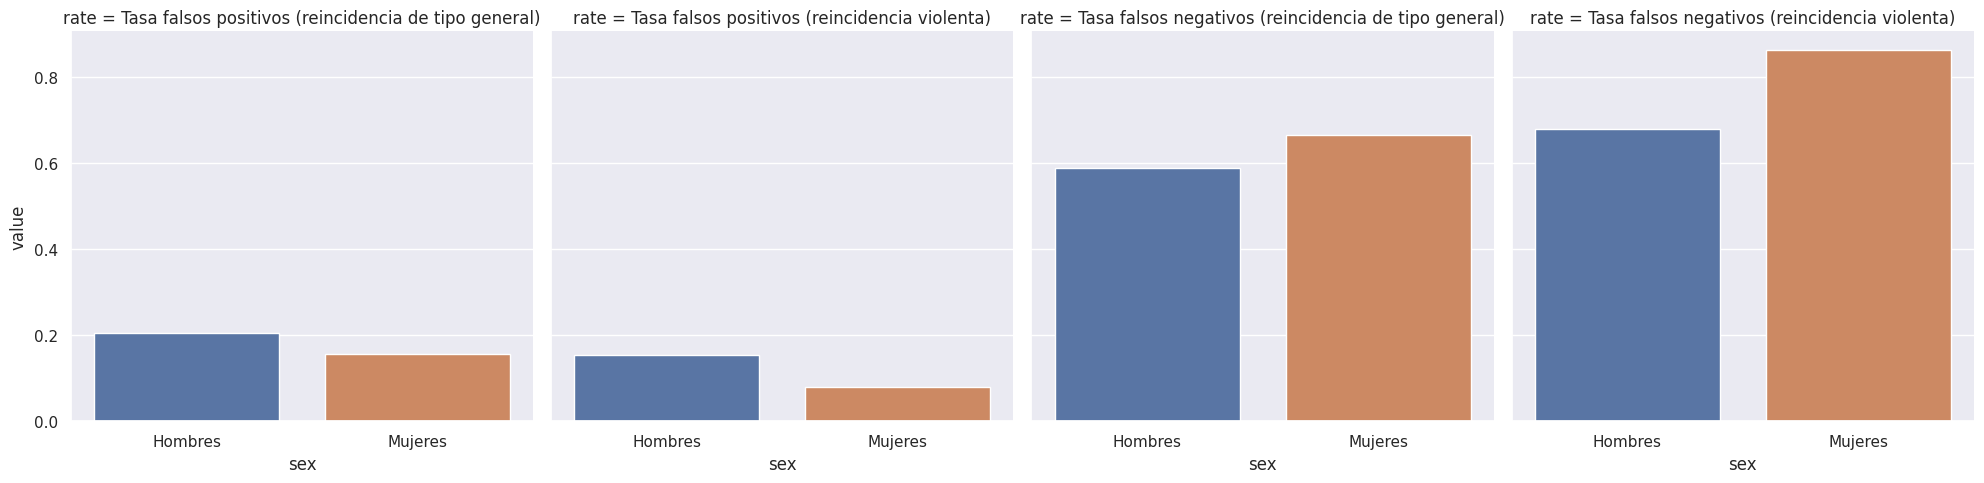

In [141]:
# Gráficamos las tasas por sexo y tipo de reincidencia:
sns.catplot(data=tasas_sexos,x='sex',y='value',col='rate',kind='bar')
plt.show()

En este caso, parece que el clasificador se confunde más en contra de los hombres, ya que las tasas de falsos positivos son mayores (predice como reincidente cuando en la realidad no lo va a ser) y las de falsos negativos menores (predice como no reincidente cuando en la realidad si lo va a ser), pero las diferencias son menores a las obtenidas en el análisis por raza anterior como para sacar una conclusión sobre la "justicia" para esta clasificación.

### 5. Comparación de la capacidad predictiva del sistema Compas para la predicción del riesgo de reincidencia por delitos generales o delitos con uso de violencia.

Revisemos resultados de las métricas obtenidas:

In [142]:
# Generamos series con los resultados de la métricas de clasificación binaria a partir
#de las función generada en apartado anterior:
s1_g=pd.Series(metricas(vp,vn,fp,fn))
s2_g=pd.Series(AUC_ROC_g)
s_g=s1_g.append(s2_g,ignore_index=True)

s1_v=pd.Series(metricas(rv_vp,rv_vn,rv_fp,rv_fn))
s2_v=pd.Series(AUC_ROC_v)
s_v=s1_v.append(s2_v,ignore_index=True)


In [143]:
# Gereramos dataframe con las series:
capacidad_predictiva_por_delitos=pd.DataFrame({'Ratio':['sensibilidad','especificidad','TFP',
                                                        'TFN','precision','axactitud','F_score','AUC_ROC'],\
                                               'Delitos_generales':s_g.to_list(),'Delitos_violentos':s_v.to_list()})

In [144]:
# Pasamos el dataframe a formato largo:
capacidad_predictiva_por_delitos=capacidad_predictiva_por_delitos.melt(id_vars=['Ratio'],value_vars=['Delitos_generales',
                                                                                                     'Delitos_violentos'],
                                                                       var_name='tipo_delito')

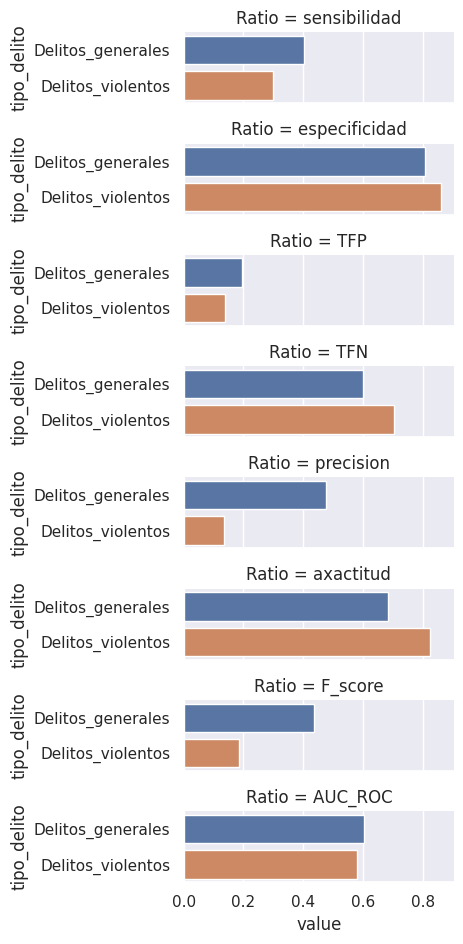

In [145]:
# Gráficamos comparativas entre las métricas para ambos tipos de delitos:
sns.catplot(data=capacidad_predictiva_por_delitos,
            y='tipo_delito',x='value',row='Ratio',kind='bar',
            height=1.2,aspect=4,orient='h')
plt.show()

En general, se observa algo mejor capacidad predictiva para delitos generales ya que el area bajo la curva ROC (AUC_ROC) es algo mayor.
En el resto de métricas hay diferencias significativas. Si consideramos preferible no liberar a un preso a liberarlo y arriesgarnos a que vuelva a delinquir, daremos preferencia a una mayor sensibilidad. En ese sentido es mejor acogernos al modelo para delitos generales.
Parece que los modelos se equivocan menos hacia predecir a alguien como reincidente que como no reincidente. Igualmente a la hora de predecir reincidencia por delitos con violencia, se equivoca más. Puede ser porque el número de datos para delitos con violencia es menor. Esto puede explicar el menor acierto en reincidencia con violencia comentada en el apartados anteriores.